# Investigation
We will be investigating what variables will have the most impact on a house's market price.  We will be investigating from the perspective of a start up company which buys inexpensive houses and "flips" them for profit.

## Objectives:

* Find what aspects of a house have a significant impact on house's value
* Discover how much a house's value will change based on a changes in condition
* Find the areas that are more profitable to sell homes. 

2  Obtaining data
Time to import the necessary libraries and initialize a data frame containing the data from the CSV file.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import stats
import statsmodels.stats.api as sms

sns.set_style('darkgrid')

## Initializing data frame

In [2]:
df = pd.read_csv('csv_files/kc_house_data.csv')
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  

[3 rows x 21 columns]

# Scrubbing the Data
Now that the data frame has been initialized, we'll start cleaning.

Notes: Problems that I can immediately see are: 
* waterfront, view, and yr_renovated are missing values. 
* sqft_basement and dates are objects instead of integer/float and datetime, respectively. 

## Waterfront

In [3]:
print(df.waterfront.value_counts())
waterfront = df[df['waterfront'] == 1.0]
waterfront['price'].describe()


0.0    19075
1.0      146
Name: waterfront, dtype: int64


count    1.460000e+02
mean     1.717215e+06
std      1.145385e+06
min      2.850000e+05
25%      8.275000e+05
50%      1.510000e+06
75%      2.282500e+06
max      7.060000e+06
Name: price, dtype: float64

In [4]:
# Looked at low end prices of waterfront properties out of curiousity.
# waterfront will play a significant role in price.  Replacing NaN's with 
# median
df.waterfront.fillna(df['waterfront'].median(), inplace=True)
df.waterfront.isna().sum()

0

In [5]:
# making dummies
wtr_dummies = pd.get_dummies(df['waterfront'],prefix='waterfront')
df = pd.concat([df, wtr_dummies], axis=1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      17755 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null uint8
waterfront_1.0 

In [7]:
#fixing datatypes

for col in df.columns:
    if df[col].dtype == df['waterfront_1.0'].dtype:
        df[col] = df[col].astype(int)
df['waterfront_0.0'].dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      17755 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
waterfront_0.0    21597 non-null int32
waterfront_1.0 

In [8]:
df2 = df.drop(['waterfront'], axis=1)
df2 = df2.rename(columns={'waterfront_0.0':'waterfront_N',
                         'waterfront_1.0':'waterfront_Y'})
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_N', 'waterfront_Y'],
      dtype='object')

## Yr_renovated

In [9]:
# Checking out yr_renovated  ***Take deeper look into this***
df2.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
# Since having data about renovated homes might be useful, filling NaN's with
# median
df2.yr_renovated.fillna(df2['yr_renovated'].median())

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

### Is It Categorical? 

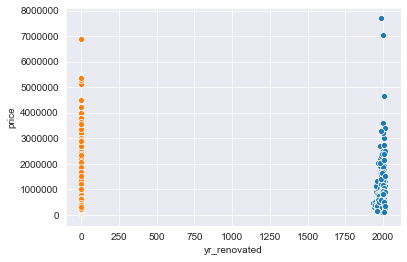

In [11]:
# checking the impact of homes renovated versus not renovated against price

no_reno = df2[df2['yr_renovated'] == 0]

reno = df2[df2['yr_renovated'] != 0]

sns.scatterplot(x=reno['yr_renovated'], y=reno['price'])
sns.scatterplot(x=no_reno['yr_renovated'], y=no_reno['price'])

The columns 'yr_renovated' is categorical so we'll alter data frame to represent this. Renovated homes will be represented by a 1 and non-renovated homes will be represented by a 0.

In [12]:
for i in range(len(df['yr_renovated'])):
    if df2['yr_renovated'].iloc[i] != 0.0:
        df2['yr_renovated'].iloc[i] = 1.0
# change name to just renovated
df2 = df2.rename(columns={'yr_renovated' : 'renovated'})

In [13]:
# label encoding
df2['renovated'] = df2['renovated'].astype('category')
df2['renovated'] = df2.renovated.cat.codes

In [14]:
df2['renovated']

0        0
1        1
2        1
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated, Length: 21597, dtype: int8

## Yr_built

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

Number of null values:
0


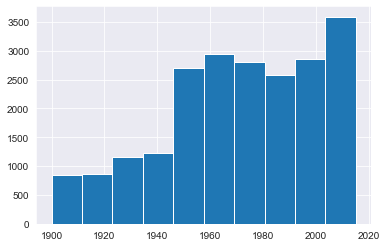

In [15]:
print(df2.yr_built.value_counts())
print("\nNumber of null values:")
print(df2.yr_built.isnull().sum())
df2.yr_built.hist()

In [16]:
# label-encoding
df2['yr_built'] = df2['yr_built'].astype('category')
df2['yr_built'] = df2.yr_built.cat.codes
df2['yr_built'].value_counts()

114    559
106    453
105    450
104    433
103    420
      ... 
33      30
1       29
2       27
35      24
34      21
Name: yr_built, Length: 116, dtype: int64

## Floors

In [17]:
df2.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Text(0, 0.5, 'value counts')

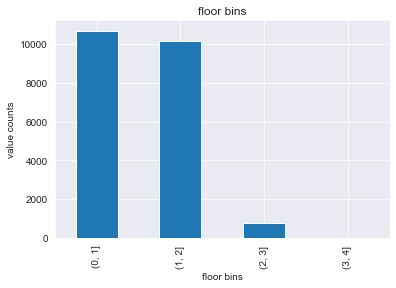

In [18]:
bins = [0, 1, 2, 3, 4]
bin_flr = pd.cut(df2['floors'], bins)
bin_flr = bin_flr.cat.as_ordered()

bin_flr.value_counts().plot(kind='bar')
plt.title('floor bins')
plt.xlabel('floor bins')
plt.ylabel('value counts')

In [19]:
# now to afix this to our data frame and create dummies
df2['floors'] = bin_flr
df2['floors'] = df2['floors'].cat.codes
# Creating dummies
flrbin_dummies = pd.get_dummies(bin_flr, prefix='floors') #keeping first column 
                                                # so future names make sense

df2 = df2.drop(['floors'], axis=1)
df2 = pd.concat([df2, flrbin_dummies], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_(0, 1]    21597 non-null uint8
floors_(1, 2]    21597 non-null uint8
floors_

In [20]:
df2 = df2.rename(columns={'floors_(0, 1]':'floors_1', 
                          'floors_(1, 2]':'floors_2', 
                          'floors_(2, 3]':'floors_3', 
                          'floors_(3, 4]':'floors_3_half'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null uint8
floors_2         21597 non-null uint8
floors_

In [21]:
cats = ['floors_1', 'floors_2', 'floors_3', 'floors_3_half']
for cat in cats:
    df2[cat] = df2[cat].astype('category')
    df2[cat] = df2[cat].cat.codes

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3 

## View

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
renovated         0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
waterfront_N      0
waterfront_Y      0
floors_1          0
floors_2          0
floors_3          0
floors_3_half     0
dtype: int64


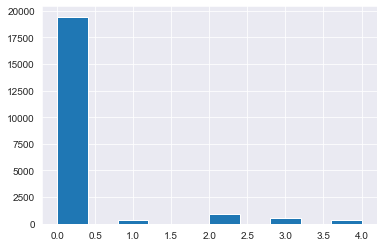

In [23]:
# view column refers to how many times the home has been viewed
print(df2.view.value_counts())
print(df2.isnull().sum())
df2.view.hist()

In [24]:
med_vu = df2.view.median()
med_vu

0.0

In [25]:
# Only makes up 0.29% of total data, but the median does not change the 
# create a new category.  Fill with median.
df2.fillna(value=med_vu, inplace=True)
df2.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  view  condition  grade  ...      lat     long  sqft_living15  \
0      5650   0.0          3      7  ...  47.5112 -122.257           1340   
1      7242   0.0          3      7  ...  47.7210 -122.319           1690   
2     10000   0.0          3      6  ...  47.7379 -122.233           2720   
3      5000   0.0          5      7  ...  47.5208 -122.393           1360   
4      8080   0.0          3      8  ...  47.6168 -122.045           1800   

   sqft_lot15  waterfront_N  waterfront_Y  floors_1  floors_2  floors_3  \
0        5650             1             0         1         0         0   
1        7639             1             0         0         1         0   
2        8062             1             0         1         0         0   
3        5000             1             0         1         0         0   
4        7503             1             0         1         0         0   

   floors_3_half  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 25 columns]

In [26]:
# Changing to binary of has been viewed or not
for i in range(len(df['view'])):
    if df2['view'].iloc[i] != 0.0:
        df2['view'].iloc[i] = 1.0
df2.view.value_counts()

0.0    19485
1.0     2112
Name: view, dtype: int64

In [27]:
# label encoding
df2['view'] = df2['view'].astype('category')
df2['view'] = df2.view.cat.codes

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3    

## Date

In [29]:
# Time to deal with object types.
import datetime as dt
df2.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [30]:
# convert 'date' to datetime, then creating 2 new columns so that we can work
# with numerical data
df2.date = pd.to_datetime(df['date'])
df2['month'] = df2['date'].dt.month
df2['day_of_year'] = df2['date'].dt.dayofyear


In [31]:
# converting day of year to category
# label encoding
df2['day_of_year'] = df2['day_of_year'].astype('category')
df2['day_of_year'] = df2.day_of_year.cat.codes

## Sqft_Basement

In [32]:
# inspecting sqft_basement values
df2['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
666.0         1
768.0         1
1920.0        1
207.0         1
2400.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [33]:
# 452 values of '?'. Makes up 2.1% of our data. 
med_bsmt = df2[df2['sqft_basement'] != '?']
med = med_bsmt.sqft_basement.median()

for i in range(len(df['sqft_basement'])):
    if df2['sqft_basement'].iloc[i] == '?':
        df2['sqft_basement'].iloc[i] = str(med)


df2.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
666.0         1
768.0         1
1920.0        1
207.0         1
2400.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [34]:
# convert to float
df2['sqft_basement'] = df2.sqft_basement.astype(float)
df2.sqft_basement.dtype

dtype('float64')

In [35]:
for i in range(len(df2['sqft_basement'])):
    if df2['sqft_basement'].iloc[i] != 0.0:
        df2['sqft_basement'].iloc[i] = 1.0
        
df2 = df2.rename(columns={'sqft_basement' : 'basement'})
df2.basement.head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: basement, dtype: float64

In [36]:
# label encoding
df2['basement'] = df2['basement'].astype('category')
df2['basement'] = df2.basement.cat.codes

## Zip Codes

In [37]:
zips = len(df2['zipcode'].unique())
zips

70

In [38]:
df2.zipcode.isna().sum()

0

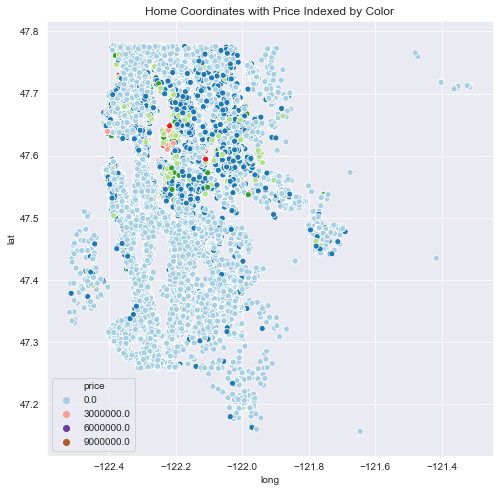

In [39]:
long = df2['long']
lat = df2['lat']
plt.figure(figsize=(8,8))
sns.scatterplot(x=long, y=lat, hue='price', data=df2, palette='Paired')
plt.title('Home Coordinates with Price Indexed by Color')
plt.legend(fancybox=True)

In [40]:
# turning zipcodes into categorical data via label-encoding
# label-encoding
df2['zipcode'] = df2['zipcode'].astype('category')
df2['zipcode'] = df2.zipcode.cat.codes
df2['zipcode'].value_counts()

42    602
23    589
49    583
28    574
51    553
     ... 
41    104
8     100
14     80
61     57
24     50
Name: zipcode, Length: 70, dtype: int64

In [41]:
# splitting into 4 quadrants

df2.loc[(df2['lat'] > 47.5) & (df2['long'] < -121.9), 
            "quad_1"] = 1
df2.loc[(df2['lat'] >= 47.5) & (df2['long'] >= -121.9), 
            "quad_2"] = 121.9
df2.loc[(df2['lat'] < 47.5) & (df2['long'] < -121.9), 
            "quad_3"] = 1
df2.loc[(df2['lat'] < 47.5) & (df2['long'] > -121.9), 
            "quad_4"] = 1

In [42]:
df2.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
view                 0
condition            0
grade                0
sqft_above           0
basement             0
yr_built             0
renovated            0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
waterfront_N         0
waterfront_Y         0
floors_1             0
floors_2             0
floors_3             0
floors_3_half        0
month                0
day_of_year          0
quad_1            7012
quad_2           21189
quad_3           15211
quad_4           21383
dtype: int64

In [43]:
df2 = df2.fillna(value=0)
print(df2.shape)
df2.isna().sum()

(21597, 31)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
view             0
condition        0
grade            0
sqft_above       0
basement         0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront_N     0
waterfront_Y     0
floors_1         0
floors_2         0
floors_3         0
floors_3_half    0
month            0
day_of_year      0
quad_1           0
quad_2           0
quad_3           0
quad_4           0
dtype: int64

In [44]:
df3 = df2.copy()

In [45]:
# associate zipcodes with quadrants
#zc_test = df3.copy()
#zc_test = df3[['id', 'zipcode', 'quad_1', 'quad_2', 'quad_3', 'quad_4']]
#zc_test.shape

In [46]:
#zc1 = zc_test[zc_test['quad_1'] == 1.0]
#zc2 = zc_test[zc_test['quad_2'] == 1.0]
#zc3 = zc_test[zc_test['quad_3'] == 1.0]
#zc4 = zc_test[zc_test['quad_4'] == 1.0]
#zc4.head()

In [47]:
#zc1 = zc1.drop(['quad_1', 'quad_2', 'quad_3', 'quad_4'], axis=1)
#zc1 = zc1.rename(columns={'zipcode':'zc_qd1'})


#zc2 = zc2.drop(['quad_1', 'quad_2', 'quad_3', 'quad_4'], axis=1)
#zc2 = zc2.rename(columns={'zipcode':'zc_qd2'})


#zc3 = zc3.drop(['quad_1', 'quad_2', 'quad_3', 'quad_4'], axis=1)
#zc3 = zc3.rename(columns={'zipcode':'zc_qd3'})


#zc4 = zc4.drop(['quad_1', 'quad_2', 'quad_3', 'quad_4'], axis=1)
#zc4 = zc4.rename(columns={'zipcode':'zc_qd4'})


#zc4.head()

In [48]:
# reformatting zc dfs 
#trial = pd.concat([zc1, zc2, zc3, zc4], axis=1,)


In [49]:
#trial.head()

In [50]:
#trial = trial.reset_index()
#trial.shape

In [51]:
#trial = trial.fillna(value=0)
#trial.isna().sum()

In [52]:
#for col in trial:
#    if trial[col].dtype == 'float64':
#        trial[col] = trial[col].astype(int)
#trial.info()

In [53]:
#dfx = df2.set_index('id')
#dfx.head()

In [54]:
#dfx = dfx.join(trial, how='inner')
#dfx.head()

In [55]:
#df3 = dfx.copy()

In [56]:
# label encoding
cats = ['quad_1', 'quad_2', 'quad_3', 'quad_4']
for cat in cats:
    df3[cat] = df3[cat].astype('category')
    df3[cat] = df3[cat].cat.codes
df3.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  view  condition  grade  ...  floors_1  floors_2  floors_3  \
0      5650     0          3      7  ...         1         0         0   
1      7242     0          3      7  ...         0         1         0   
2     10000     0          3      6  ...         1         0         0   
3      5000     0          5      7  ...         1         0         0   
4      8080     0          3      8  ...         1         0         0   

   floors_3_half  month  day_of_year  quad_1  quad_2  quad_3  quad_4  
0              0     10          279       1       0       0       0  
1              0     12          335       1       0       0       0  
2              0      2           49       1       0       0       0  
3              0     12          335       1       0       0       0  
4              0      2           42       1       0       0       0  

[5 rows x 31 columns]

In [57]:
df3.reset_index()
df3.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  view  condition  grade  ...  floors_1  floors_2  floors_3  \
0      5650     0          3      7  ...         1         0         0   
1      7242     0          3      7  ...         0         1         0   
2     10000     0          3      6  ...         1         0         0   
3      5000     0          5      7  ...         1         0         0   
4      8080     0          3      8  ...         1         0         0   

   floors_3_half  month  day_of_year  quad_1  quad_2  quad_3  quad_4  
0              0     10          279       1       0       0       0  
1              0     12          335       1       0       0       0  
2              0      2           49       1       0       0       0  
3              0     12          335       1       0       0       0  
4              0      2           42       1       0       0       0  

[5 rows x 31 columns]

In [58]:
# checking for zipcode alignment
# zips_align = df3[['zipcode', 'zc_qd1', 'zc_qd2','zc_qd3', 'zc_qd4']]
# zips_align.head()

## Grade

In [59]:
df3.shape

(21597, 31)

In [60]:
df3['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

Unique values are 3-13.  If we bin by every 3 numbers, we'll lose value 13 Creating bins are based on odd numbers, we'll be able to account for all of
the values

Text(0, 0.5, 'value counts')

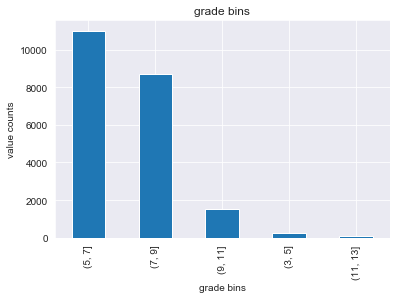

In [61]:
bins = [3, 5, 7, 9, 11, 13]
bin_grd = pd.cut(df3['grade'], bins)
bin_grd = bin_grd.cat.as_ordered()

bin_grd.value_counts().plot(kind='bar')
plt.title('grade bins')
plt.xlabel('grade bins')
plt.ylabel('value counts')

In [62]:
# now to afix this to our data frame and create dummies
df3['grade'] = bin_grd
df3['grade'] = df3['grade'].cat.codes
# Creating dummies
gbin_dummies = pd.get_dummies(bin_grd, prefix='grade') #keeping first column 
                                                # so future names make sense

df3 = df3.drop(['grade'], axis=1)
df3 = pd.concat([df3, gbin_dummies], axis=1)
df3.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  view  condition  sqft_above  ...  day_of_year  quad_1  quad_2  \
0      5650     0          3        1180  ...          279       1       0   
1      7242     0          3        2170  ...          335       1       0   
2     10000     0          3         770  ...           49       1       0   
3      5000     0          5        1050  ...          335       1       0   
4      8080     0          3        1680  ...           42       1       0   

   quad_3  quad_4  grade_(3, 5]  grade_(5, 7]  grade_(7, 9]  grade_(9, 11]  \
0       0       0             0             1             0              0   
1       0       0             0             1             0              0   
2       0       0             0             1             0              0   
3       0       0             0             1             0              0   
4       0       0             0             0             1              0   

   grade_(11, 13]  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 35 columns]

In [63]:
df3 = df3.rename(columns={'grade_(3, 5]':'grd_F', 'grade_(5, 7]':'grd_D', 
                           'grade_(7, 9]':'grd_C', 'grade_(9, 11]':'grd_B', 
                           'grade_(11, 13]':'grd_A'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 35 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
sqft_above       21597 non-null int64
basement         21597 non-null int8
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int8
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3         21597 non-null int8
floors_3

In [64]:
# Fixing Dummy Types
cats = ['grd_A', 'grd_B', 'grd_C', 'grd_D', 'grd_F']
for cat in cats:
    df3[cat] = df3[cat].astype('category')
    df3[cat] = df3[cat].cat.codes

In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 35 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
sqft_above       21597 non-null int64
basement         21597 non-null int8
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int8
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3         21597 non-null int8
floors_3

## Months

In [66]:
# Don't want 12 dummy variables for months. Binning according to 4 seasons
bins = [0, 3, 6, 9, 12]
b_mnth = pd.cut(df3['month'], bins)
b_mnth = b_mnth.cat.as_ordered()
b_mnth.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

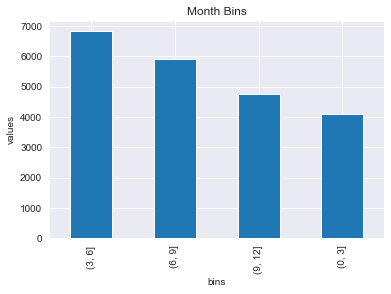

In [67]:
# Looks alright so far, lets plot and check see distribution
b_mnth.value_counts().plot(kind='bar')
plt.xlabel('bins')
plt.ylabel('values')
plt.title('Month Bins')

In [68]:
# Ok, as expected, between fall and spring you see a drop in sales. 
# Making dummies

df3['month']= b_mnth
df3['month'] = df3['month'].cat.codes
mnth_dummies = pd.get_dummies(b_mnth, prefix='season')
df4 = df3.drop(['month'], axis=1)
df4 = pd.concat([df4, mnth_dummies], axis=1)
df4.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  view  condition  sqft_above  ...  quad_4  grd_F  grd_D  grd_C  \
0      5650     0          3        1180  ...       0      0      1      0   
1      7242     0          3        2170  ...       0      0      1      0   
2     10000     0          3         770  ...       0      0      1      0   
3      5000     0          5        1050  ...       0      0      1      0   
4      8080     0          3        1680  ...       0      0      0      1   

   grd_B  grd_A  season_(0, 3]  season_(3, 6]  season_(6, 9]  season_(9, 12]  
0      0      0              0              0              0               1  
1      0      0              0              0              0               1  
2      0      0              1              0              0               0  
3      0      0              0              0              0               1  
4      0      0              1              0              0               0  

[5 rows x 38 columns]

In [69]:
# renaming columns for clarity

df4 = df4.rename(columns={'season_(0, 3]':'jan_mar', 
                            'season_(3, 6]':'apr_jun', 
                            'season_(6, 9]':'jul_sep', 
                            'season_(9, 12]':'oct_dec'})
df4 = df4.drop('date', axis=1)

In [70]:
#checking change and data types of new dummies

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 37 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
sqft_above       21597 non-null int64
basement         21597 non-null int8
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int8
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3         21597 non-null int8
floors_3_half    21597 non-null int8
day_of_year      2

In [71]:
cats = ['jan_mar', 'apr_jun', 'jul_sep', 'oct_dec']
for cat in cats:
    df4[cat] = df4[cat].astype('category')
    df4[cat] = df4[cat].cat.codes
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 37 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
sqft_above       21597 non-null int64
basement         21597 non-null int8
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int8
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3         21597 non-null int8
floors_3_half    21597 non-null int8
day_of_year      2

## Condition 

In [72]:
# Getting dummies for condition 
cond_dummies = pd.get_dummies(df4['condition'], prefix='cond')

In [73]:
df4 = pd.concat([df4, cond_dummies], axis=1)

In [74]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 42 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
sqft_above       21597 non-null int64
basement         21597 non-null int8
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int8
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3         21597 non-null int8
floors_3_half    21597 non-null int8
day_of_year      2

In [75]:
cats = ['cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5']
for cat in cats:
    df4[cat] = df4[cat].astype('category')
    df4[cat] = df4[cat].cat.codes
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 42 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
view             21597 non-null int8
condition        21597 non-null int64
sqft_above       21597 non-null int64
basement         21597 non-null int8
yr_built         21597 non-null int8
renovated        21597 non-null int8
zipcode          21597 non-null int8
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
waterfront_N     21597 non-null int32
waterfront_Y     21597 non-null int32
floors_1         21597 non-null int8
floors_2         21597 non-null int8
floors_3         21597 non-null int8
floors_3_half    21597 non-null int8
day_of_year      2

In [76]:
df5 = df4.drop('condition', axis=1)

## Checking for Duplicates

In [77]:
df5.id.duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [78]:
dups = df[df.duplicated(['id'],keep=False)]
dups.groupby('id', axis=1)
dups

id        date      price  bedrooms  bathrooms  sqft_living  \
93     6021501535   7/25/2014   430000.0         3       1.50         1580   
94     6021501535  12/23/2014   700000.0         3       1.50         1580   
313    4139480200   6/18/2014  1380000.0         4       3.25         4290   
314    4139480200   12/9/2014  1400000.0         4       3.25         4290   
324    7520000520    9/5/2014   232000.0         2       1.00         1240   
...           ...         ...        ...       ...        ...          ...   
20654  8564860270   3/30/2015   502000.0         4       2.50         2680   
20763  6300000226   6/26/2014   240000.0         4       1.00         1200   
20764  6300000226    5/4/2015   380000.0         4       1.00         1200   
21564  7853420110   10/3/2014   594866.0         3       3.00         2780   
21565  7853420110    5/4/2015   625000.0         3       3.00         2780   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
93         5000     1.0         0.0   0.0  ...          290.0      1939   
94         5000     1.0         0.0   0.0  ...          290.0      1939   
313       12103     1.0         0.0   3.0  ...         1600.0      1997   
314       12103     1.0         0.0   3.0  ...         1600.0      1997   
324       12092     1.0         0.0   0.0  ...          280.0      1922   
...         ...     ...         ...   ...  ...            ...       ...   
20654      5539     2.0         0.0   0.0  ...            0.0      2013   
20763      2171     1.5         0.0   0.0  ...            0.0      1933   
20764      2171     1.5         0.0   0.0  ...            0.0      1933   
21564      6000     2.0         0.0   0.0  ...            0.0      2013   
21565      6000     2.0         0.0   0.0  ...            0.0      2013   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
93              0.0   98117  47.6870 -122.386           1570        4500   
94              0.0   98117  47.6870 -122.386           1570        4500   
313             0.0   98006  47.5503 -122.102           3860       11244   
314             0.0   98006  47.5503 -122.102           3860       11244   
324          1984.0   98146  47.4957 -122.352           1820        7460   
...             ...     ...      ...      ...            ...         ...   
20654           0.0   98045  47.4759 -121.734           2680        5992   
20763           0.0   98133  47.7076 -122.342           1130        1598   
20764           0.0   98133  47.7076 -122.342           1130        1598   
21564           0.0   98065  47.5184 -121.886           2850        6000   
21565           NaN   98065  47.5184 -121.886           2850        6000   

       waterfront_0.0  waterfront_1.0  
93                  1               0  
94                  1               0  
313                 1               0  
314                 1               0  
324                 1               0  
...               ...             ...  
20654               1               0  
20763               1               0  
20764               1               0  
21564               1               0  
21565               1               0  

[353 rows x 23 columns]

In [79]:
# duplicates indicate that the houses were sold more than once. Creating 
# subset  of data to see if duplicates were purchased by house flippers
flips = dups[['id', 'date', 'price', 'condition', 'grade']]
flips.head(20)

id        date      price  condition  grade
93    6021501535   7/25/2014   430000.0          3      8
94    6021501535  12/23/2014   700000.0          3      8
313   4139480200   6/18/2014  1380000.0          3     11
314   4139480200   12/9/2014  1400000.0          3     11
324   7520000520    9/5/2014   232000.0          3      6
325   7520000520   3/11/2015   240500.0          3      6
345   3969300030   7/23/2014   165000.0          3      6
346   3969300030  12/29/2014   239900.0          3      6
371   2231500030   10/1/2014   315000.0          5      7
372   2231500030   3/24/2015   530000.0          5      7
717   8820903380   7/28/2014   452000.0          3      7
718   8820903380    1/2/2015   730000.0          3      7
823    726049190   10/2/2014   287500.0          4      7
824    726049190   2/18/2015   431000.0          4      7
836   8682262400   7/18/2014   430000.0          3      8
837   8682262400   5/13/2015   419950.0          3      8
1084  9834200885   7/17/2014   360000.0          5      7
1085  9834200885   4/20/2015   550000.0          5      7
1127  8062900070    9/9/2014   272000.0          4      7
1128  8062900070   2/13/2015   369000.0          4      7

Houses were bought at lower price and sold later at a higher price, but
**grade and condition stayed the same**. Grade and condition of these homes **did not** play a significant role in the sales of these homes. **Homes may not have been flipped**.

In [80]:
# To prevent noise in our data, will remove duplicates and keeping the most
# most recent sale price

df5 = df5.drop_duplicates(subset='id', keep='last')
df5.duplicated(['id']).value_counts()

False    21420
dtype: int64

In [81]:
df5.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
view             0
sqft_above       0
basement         0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront_N     0
waterfront_Y     0
floors_1         0
floors_2         0
floors_3         0
floors_3_half    0
day_of_year      0
quad_1           0
quad_2           0
quad_3           0
quad_4           0
grd_F            0
grd_D            0
grd_C            0
grd_B            0
grd_A            0
jan_mar          0
apr_jun          0
jul_sep          0
oct_dec          0
cond_1           0
cond_2           0
cond_3           0
cond_4           0
cond_5           0
dtype: int64

## Normalize Continuous Variables

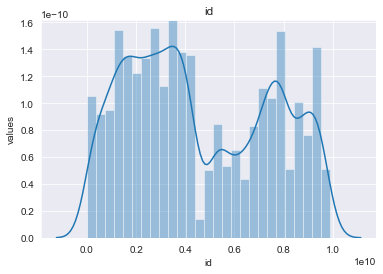

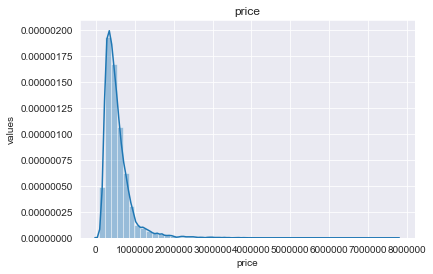

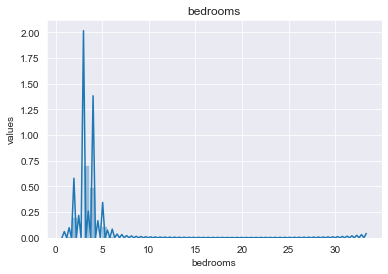

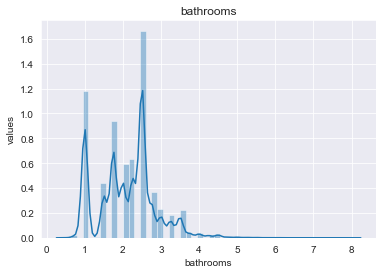

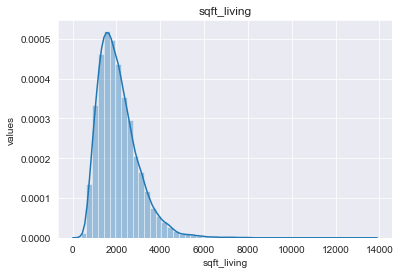

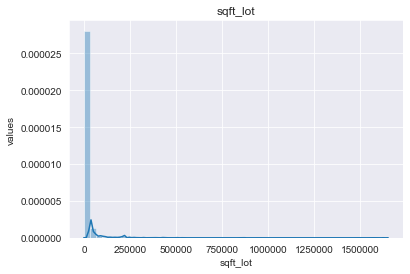

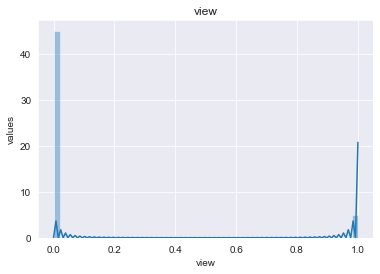

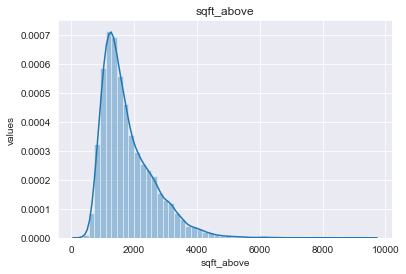

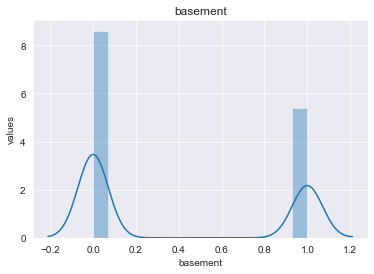

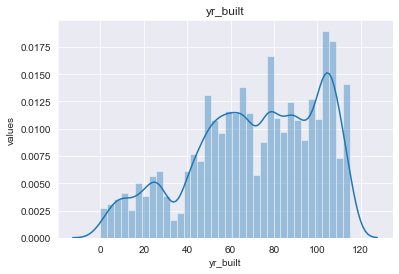

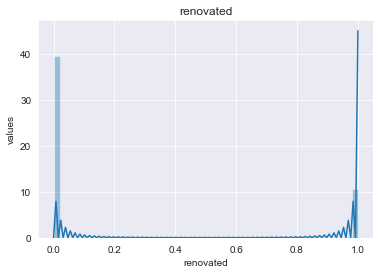

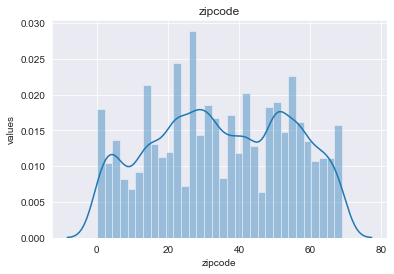

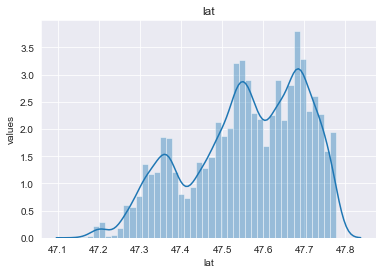

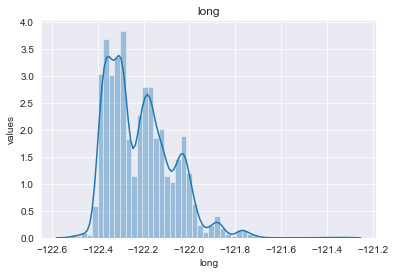

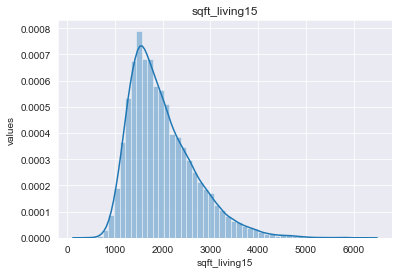

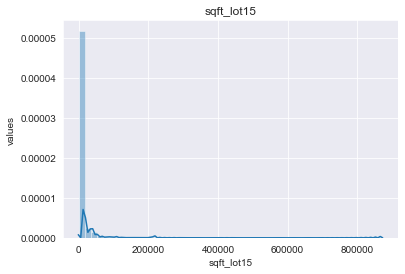

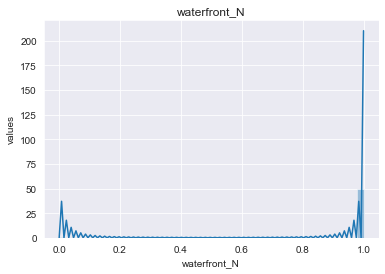

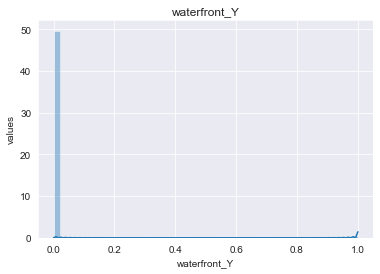

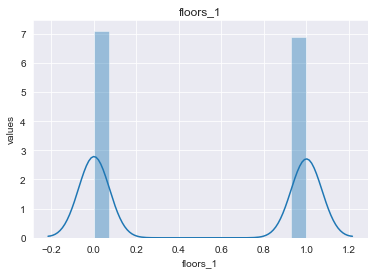

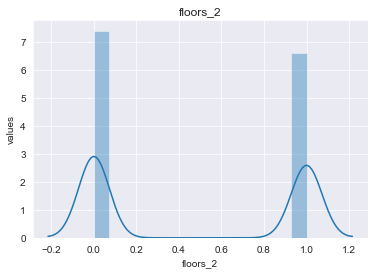

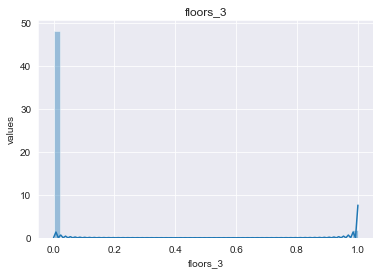

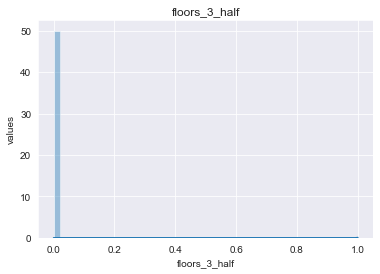

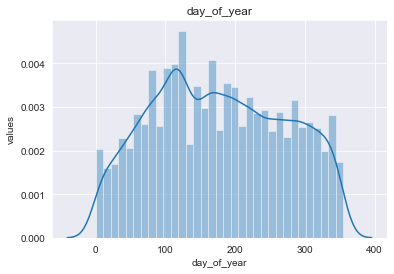

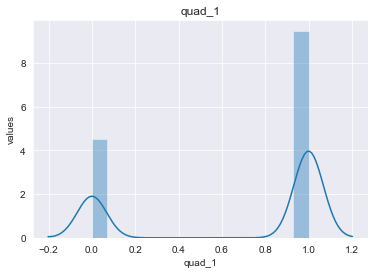

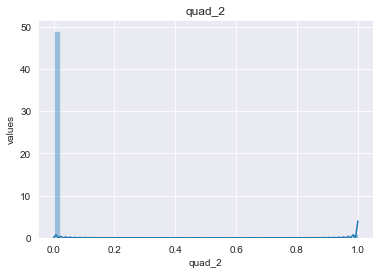

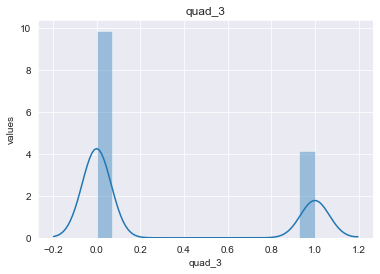

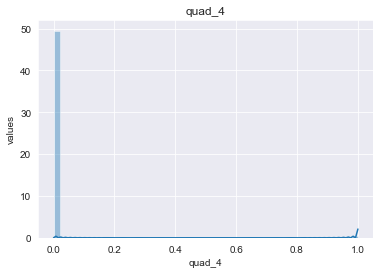

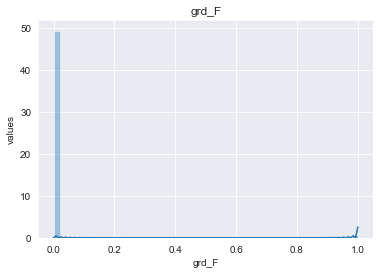

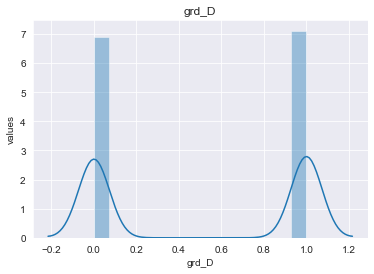

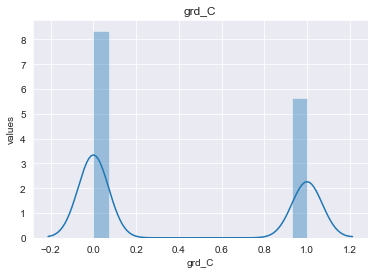

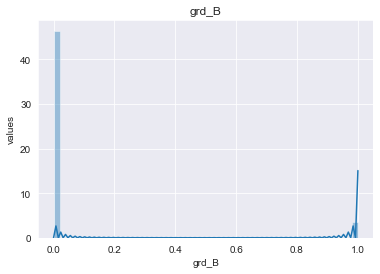

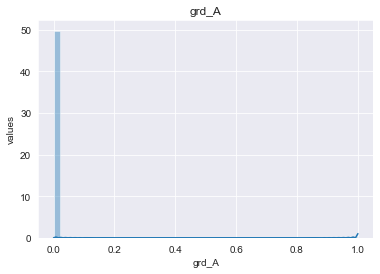

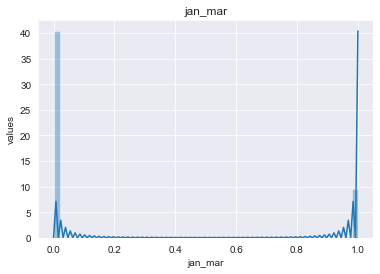

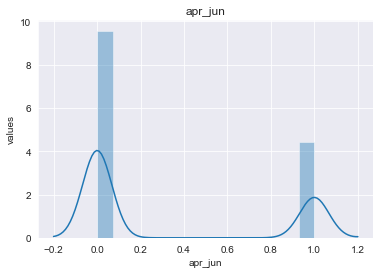

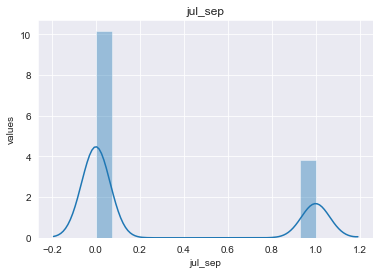

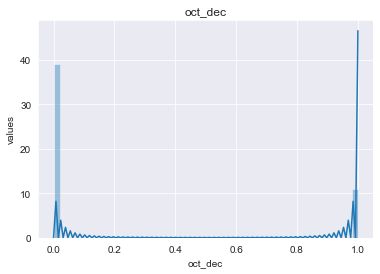

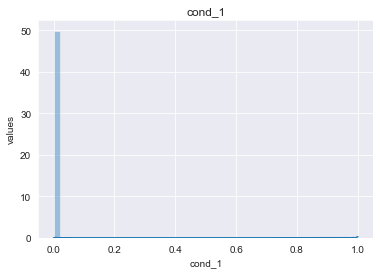

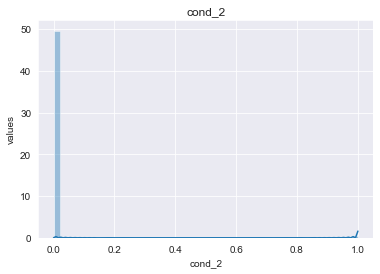

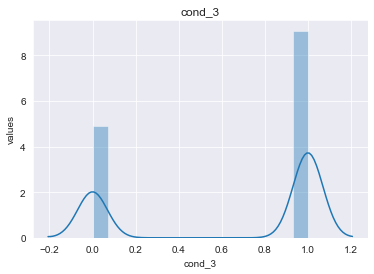

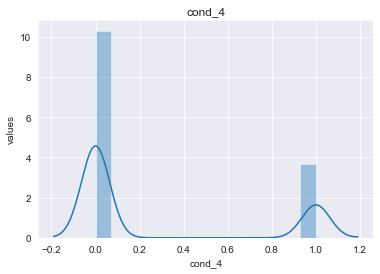

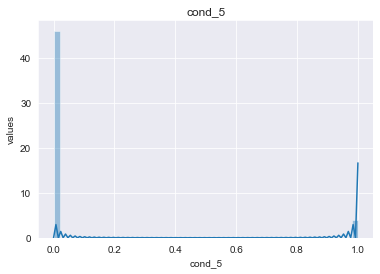

In [82]:
# seeing relationship to price
for col in df5.columns: 
    sns.distplot(df5[col], label=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('values')
    plt.title(col)
    plt.show()

In [83]:
# Identifying our continuous variables
conts = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_living', 
                  'sqft_living15', 'sqft_lot', 'sqft_lot15', 
                 'sqft_above', 'floors', 'lat','long']

In [84]:
def norm_feat(series):
    """
    Input a series containing continuous variables.
    Outputs a normalized version of the data
    """
    return (series - series.mean())/series.std()

for feat in conts:
    df5[feat] = norm_feat(df[feat])
df5.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'sqft_above', 'basement', 'yr_built', 'renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_N',
       'waterfront_Y', 'floors_1', 'floors_2', 'floors_3', 'floors_3_half',
       'day_of_year', 'quad_1', 'quad_2', 'quad_3', 'quad_4', 'grd_F', 'grd_D',
       'grd_C', 'grd_B', 'grd_A', 'jan_mar', 'apr_jun', 'jul_sep', 'oct_dec',
       'cond_1', 'cond_2', 'cond_3', 'cond_4', 'cond_5', 'floors'],
      dtype='object')

In [85]:
df5.to_csv('csv_files/new_kc_house_data_clean_with_dummies.csv')

# Exploratory Data Analysis

<Figure size 576x360 with 0 Axes>

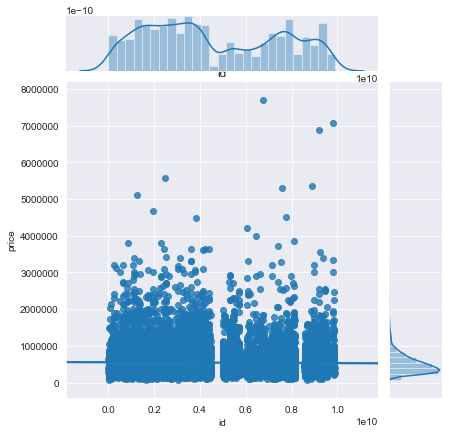

<Figure size 576x360 with 0 Axes>

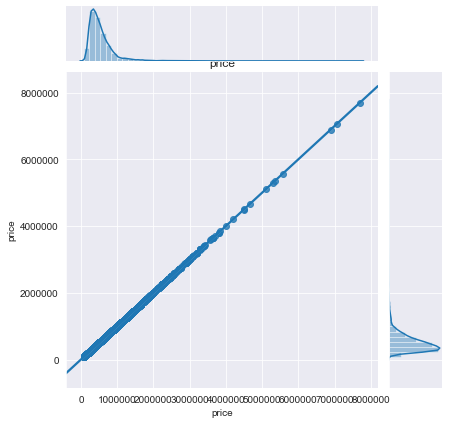

<Figure size 576x360 with 0 Axes>

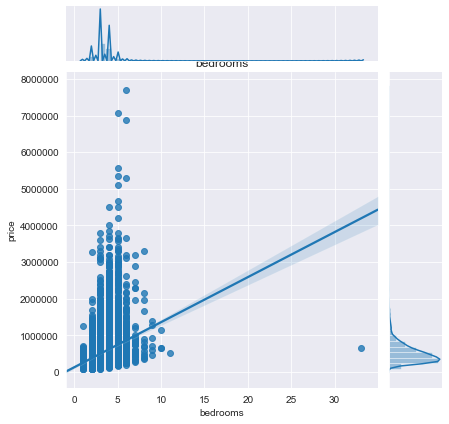

<Figure size 576x360 with 0 Axes>

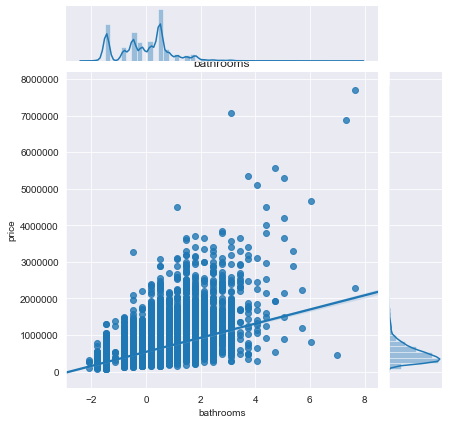

<Figure size 576x360 with 0 Axes>

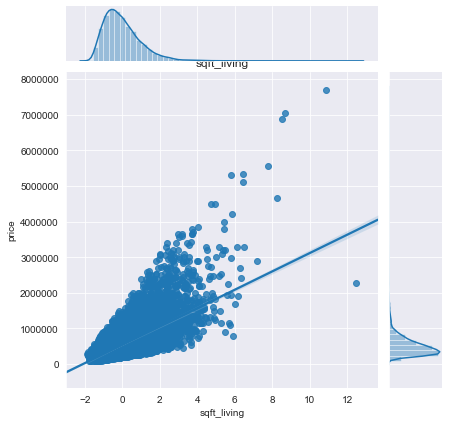

<Figure size 576x360 with 0 Axes>

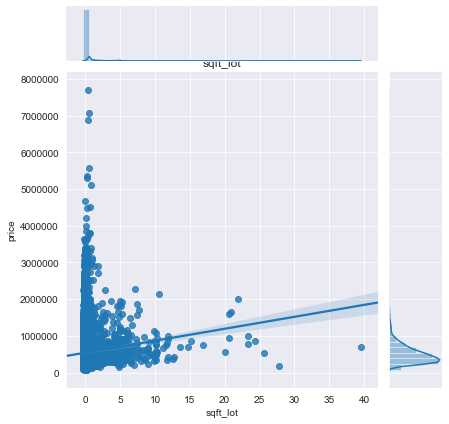

<Figure size 576x360 with 0 Axes>

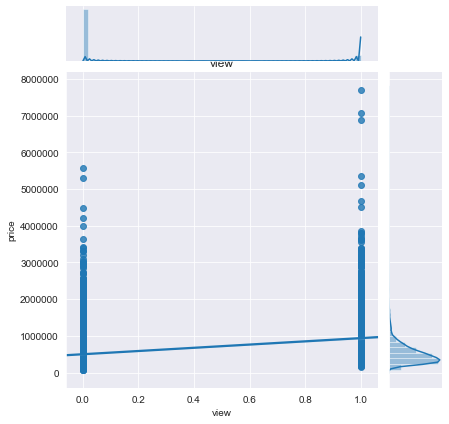

<Figure size 576x360 with 0 Axes>

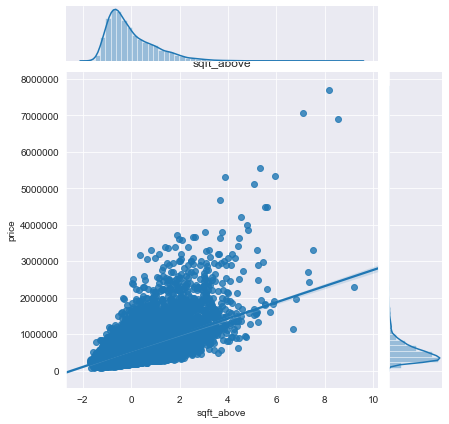

<Figure size 576x360 with 0 Axes>

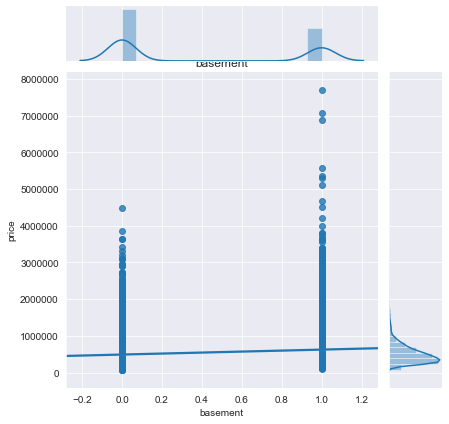

<Figure size 576x360 with 0 Axes>

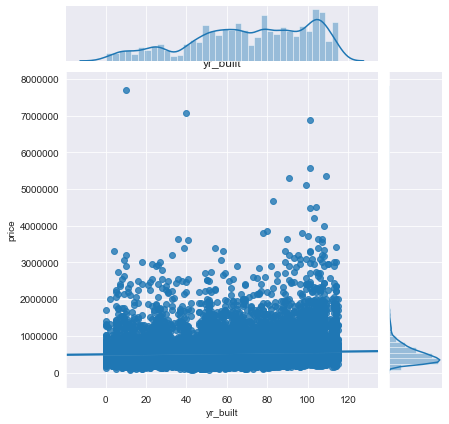

<Figure size 576x360 with 0 Axes>

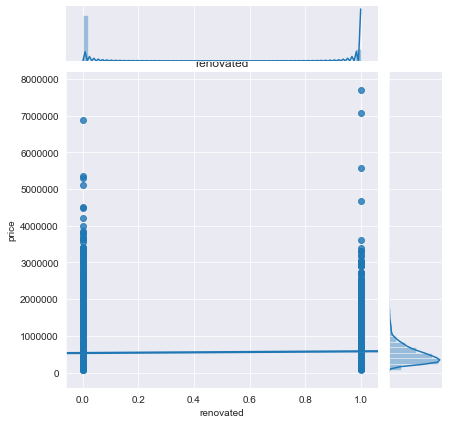

<Figure size 576x360 with 0 Axes>

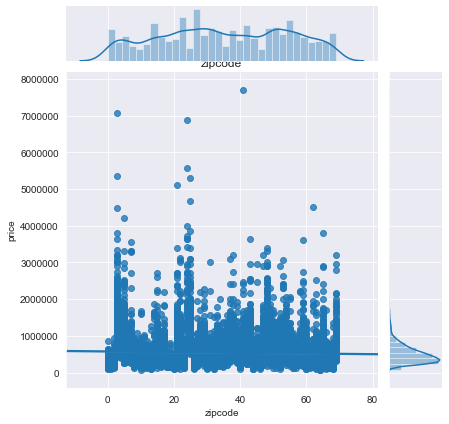

<Figure size 576x360 with 0 Axes>

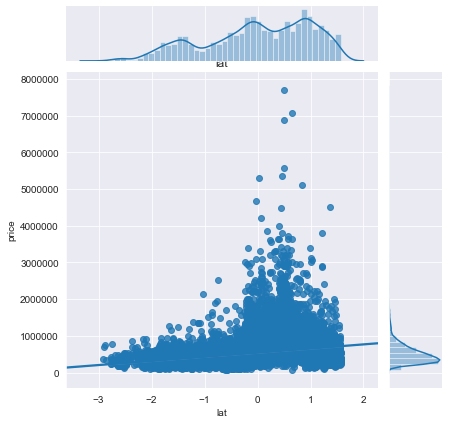

<Figure size 576x360 with 0 Axes>

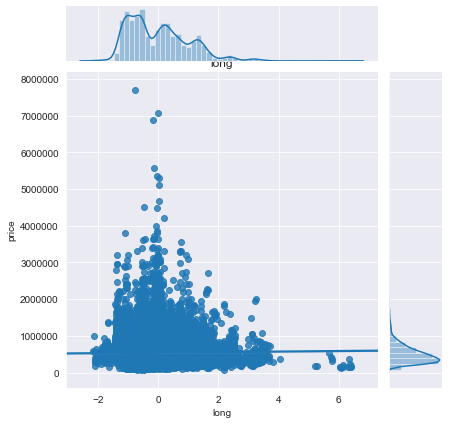

<Figure size 576x360 with 0 Axes>

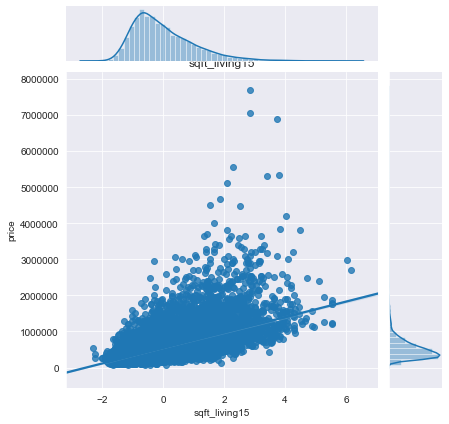

<Figure size 576x360 with 0 Axes>

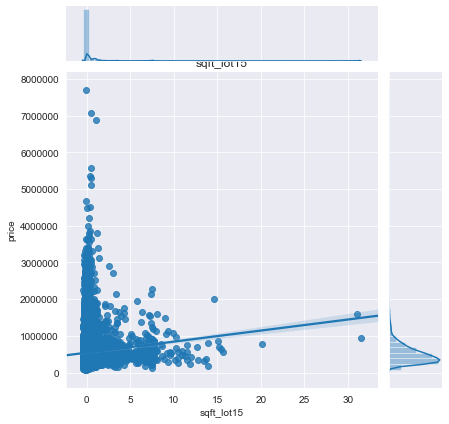

<Figure size 576x360 with 0 Axes>

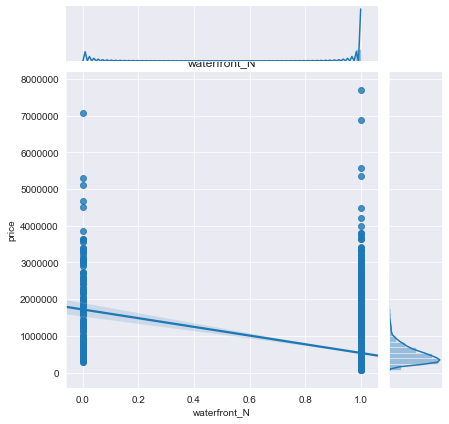

<Figure size 576x360 with 0 Axes>

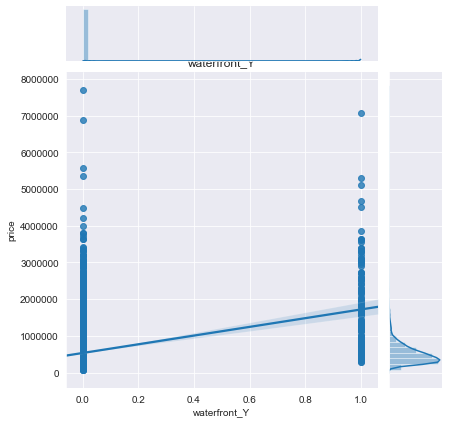

<Figure size 576x360 with 0 Axes>

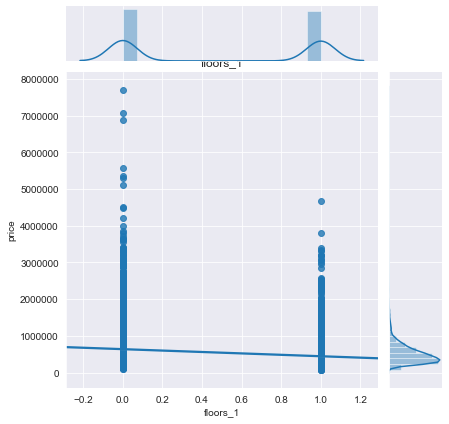

<Figure size 576x360 with 0 Axes>

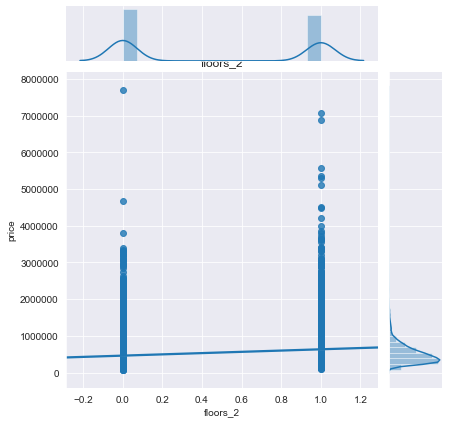

<Figure size 576x360 with 0 Axes>

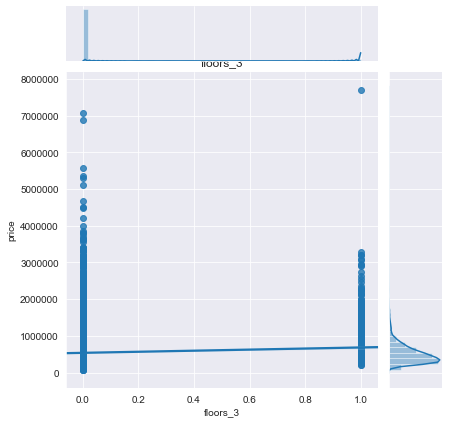

<Figure size 576x360 with 0 Axes>

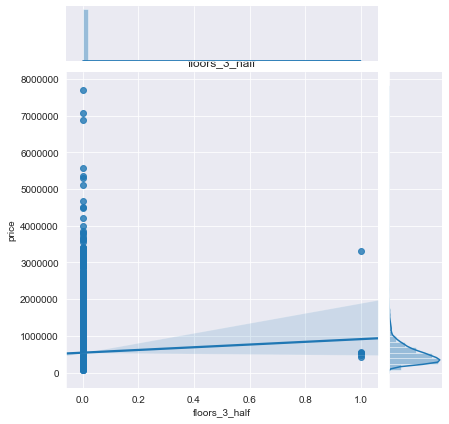

<Figure size 576x360 with 0 Axes>

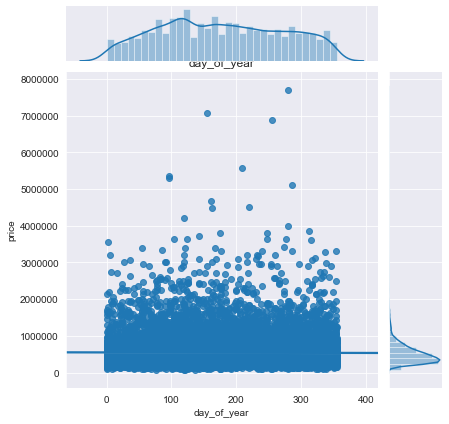

<Figure size 576x360 with 0 Axes>

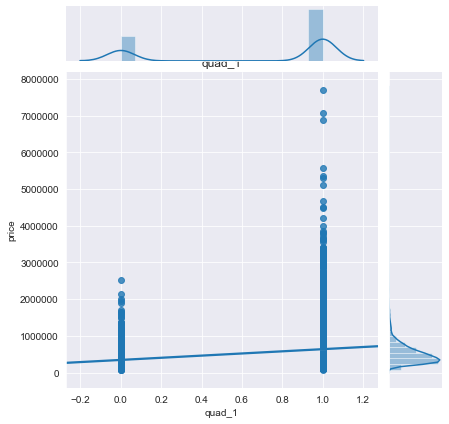

<Figure size 576x360 with 0 Axes>

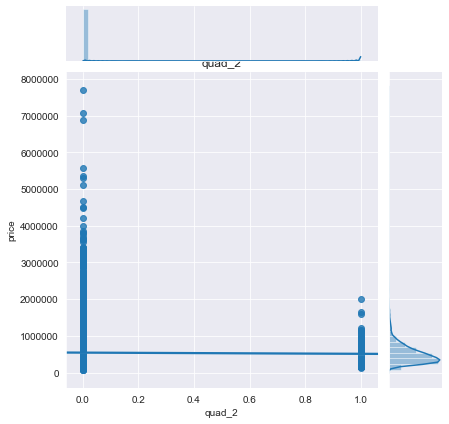

<Figure size 576x360 with 0 Axes>

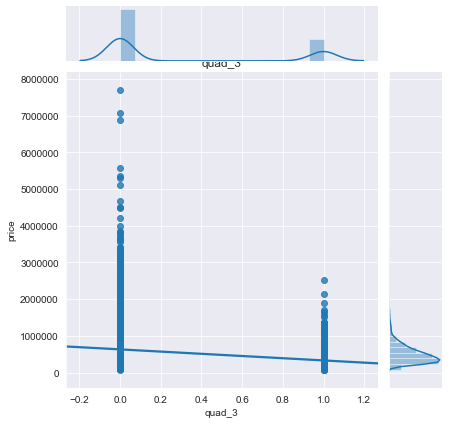

<Figure size 576x360 with 0 Axes>

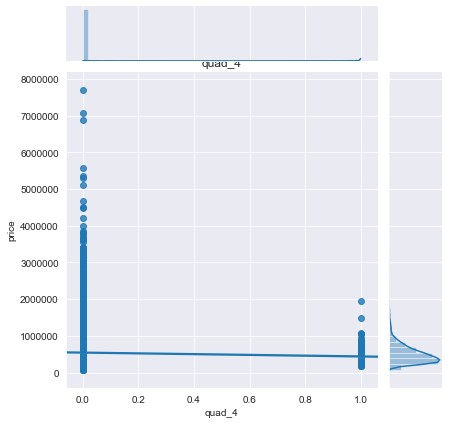

<Figure size 576x360 with 0 Axes>

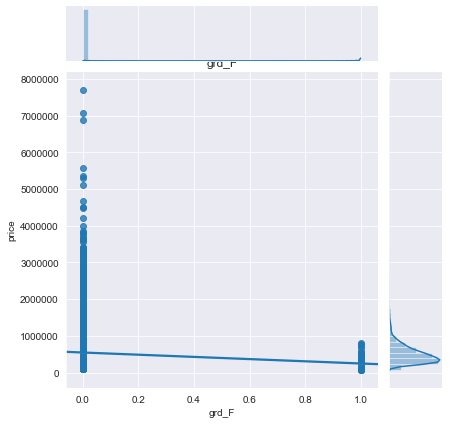

<Figure size 576x360 with 0 Axes>

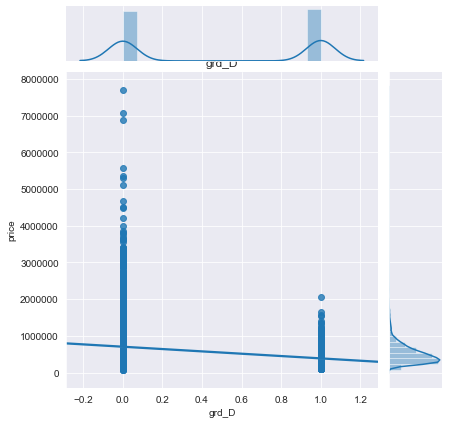

<Figure size 576x360 with 0 Axes>

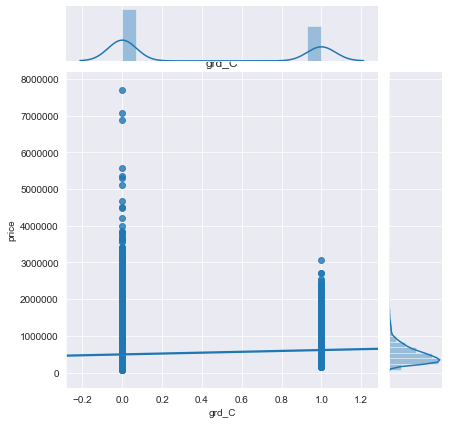

<Figure size 576x360 with 0 Axes>

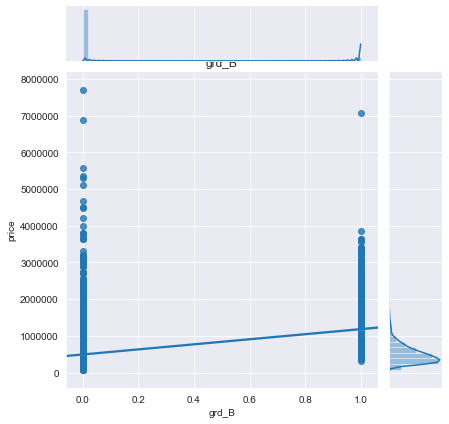

<Figure size 576x360 with 0 Axes>

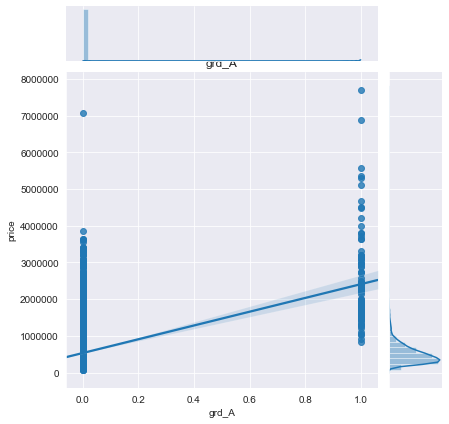

<Figure size 576x360 with 0 Axes>

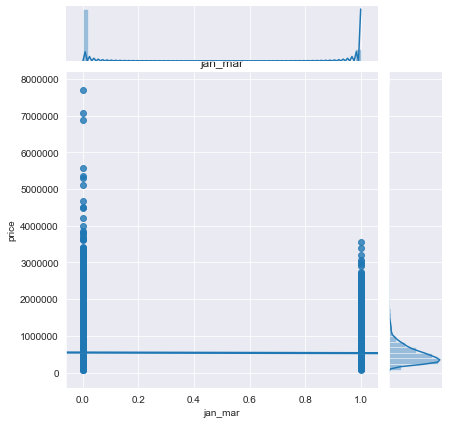

<Figure size 576x360 with 0 Axes>

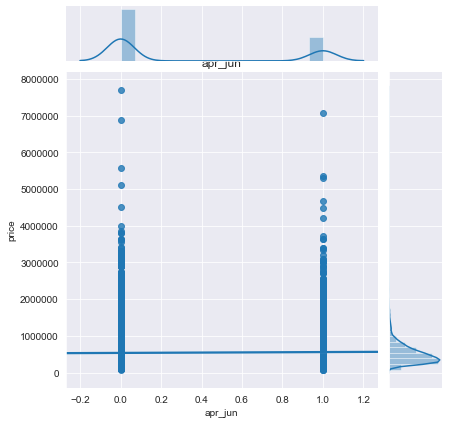

<Figure size 576x360 with 0 Axes>

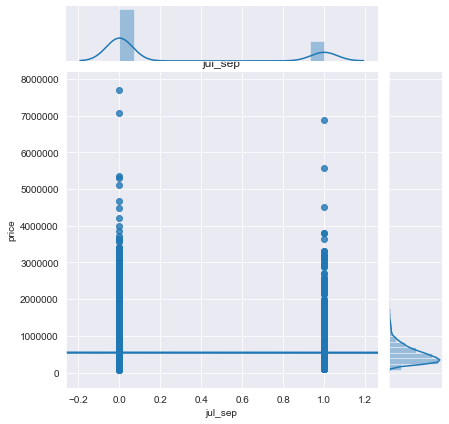

<Figure size 576x360 with 0 Axes>

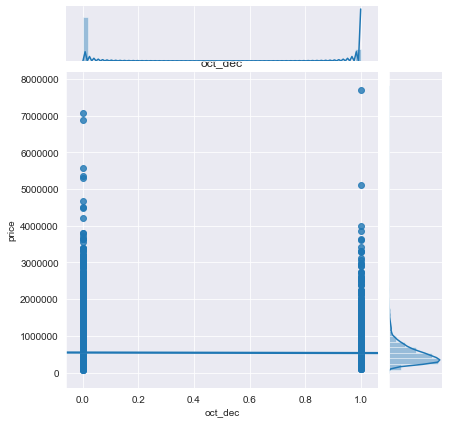

<Figure size 576x360 with 0 Axes>

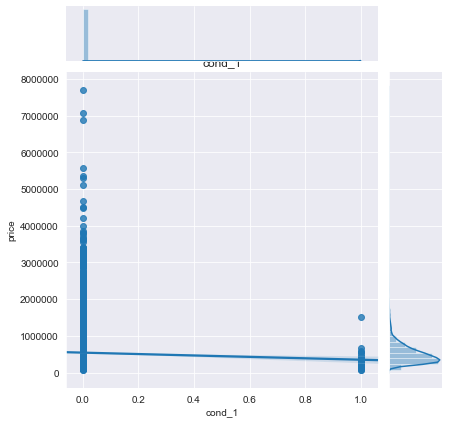

<Figure size 576x360 with 0 Axes>

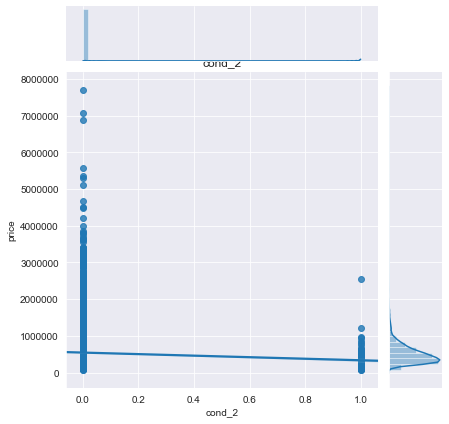

<Figure size 576x360 with 0 Axes>

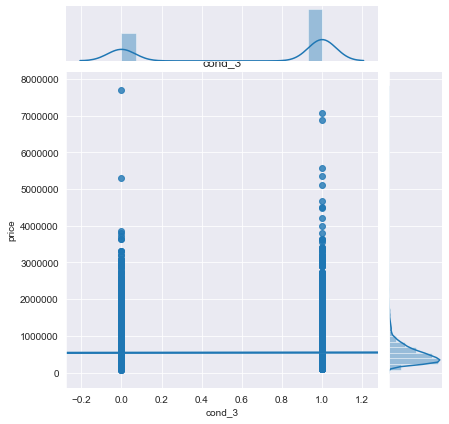

<Figure size 576x360 with 0 Axes>

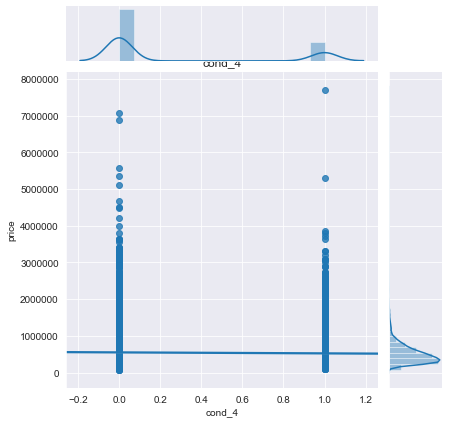

<Figure size 576x360 with 0 Axes>

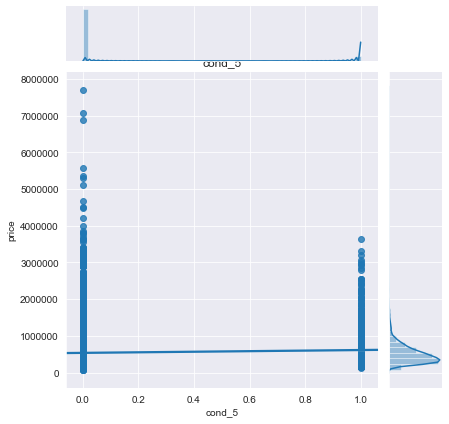

<Figure size 576x360 with 0 Axes>

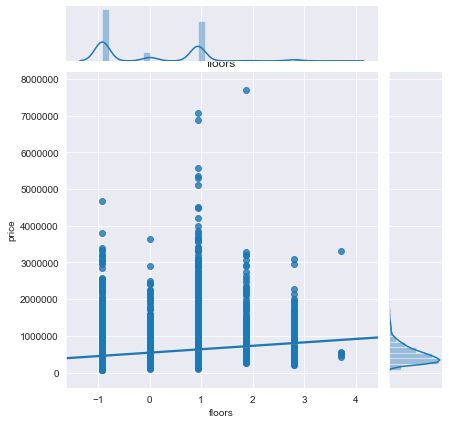

In [86]:
# Checking the relationship between each feature to the target: Price
for col in df5.columns: 
    plt.figure(figsize=(8,5))
    sns.jointplot(x= col, y= 'price', data=df5, kind='reg')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

## Quick Notes:
* **Bedrooms** has a positive relationship to price until you get above 5 bedrooms, then you start to see diminishing returns

* The number of **bathrooms** seems to have a **positive effect** on price

* **Sqft_living** has a **positive** effect, while **sqft_lot** does **not**

* **Latitude** and **longitude** indicate that the house prices increase as you go northwest (**Quadrant 1**), which happens to be the Seattle area.

* An increase in the King County **grading** system will see an **increase** in price

* The you see the most increase in price between **one floor** homes and homes with **two floors**

* Aside from outliers, the following have next to **no effect** of price:
    * Whether or not a home had been **viewed**
    * The specific **day of the year** it was purchased
    * Living on the **waterfront** has a very slight effect on price
    * Improving house from **condition 1** to **condition 2**
    * Moving from a **condition 4** to **condition 5** has little effect on price
    * **Seasons** have very little difference between each other
    * The data in **zipcode** is too noisy to discern any relationship to price, which is strange considering the interaction we see between **latitude** and **longitude**



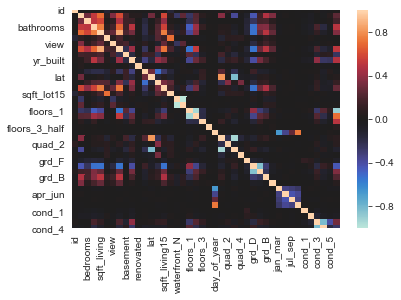

In [87]:
# checking heatmap for new correlations 
sns.heatmap(data=df5.corr(), center=0)

In [88]:
# creating a date frame that only contains the pairs of values with highest 
# correlation

# converts all elements to absolute values, stacks into multi-index, resets 
# the index to set the multi-index to seperate columns, and finally sorts them
corr_pairs = df5.corr().abs().stack().reset_index().sort_values(0, 
                                                                ascending=False)
# zipping the variable name columns
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

#set index to the pairs
pairs_index = corr_pairs.set_index(['pairs'])

#dropping level columns
pairs = pairs_index.drop(columns=['level_0', 'level_1'])

#renaming column for comprehension
pairs.columns = ['correlation']
#Since our heatmap shows that our variables only show perfect correlation with 
#themselves, we'll drop duplicates
unique_pairs = pairs.drop_duplicates()

In [89]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

correlation
pairs                                    
(quad_3, quad_1)                 0.934385
(floors_2, floors_1)             0.929959
(floors, floors_1)               0.904925
(sqft_above, sqft_living)        0.876533
(grd_C, grd_D)                   0.836263
(quad_3, lat)                    0.826516
(quad_1, lat)                    0.821455
(cond_3, cond_4)                 0.813095
(sqft_living, sqft_living15)     0.756186
(bathrooms, sqft_living)         0.755522

In [90]:
# Many of these correlations are a result of the dummy trap, in which case, 
# we'll drop one feature from each set of dummy variables. 'floors' was mean
# to be dropped anyway, sqft_living and sqft_above measure the same thing, so 
# we'll drop sqft_above. Also, drop grd_D, cond_4, and sqft_living15
to_drop = ['id','price', 'sqft_above', 'floors', 'floors_1','grd_D','cond_4',
           'bathrooms', 'waterfront_N', 'jan_mar','floors_3_half','jul_sep',
           'oct_dec', 'quad_2']

# Modeling

In [91]:

# dropping quad_3, sqft_above, bathrooms, sqft_living15, cond_3, grd_C

target = 'price'

feats = df5.drop(to_drop, axis=1).columns
preds = '+'.join(feats)

formula = target + '~' + preds
model = smf.ols(formula=formula, data=df5).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.722      
Dependent Variable:      price               AIC:                   582346.7023
Date:                    2020-07-20 16:28    BIC:                   582577.8926
No. Observations:        21420               Log-Likelihood:        -2.9114e+05
Df Model:                28                  F-statistic:           1991.      
Df Residuals:            21391               Prob (F-statistic):    0.00       
R-squared:               0.723               Scale:                 3.7508e+10 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
Intercept      743554.4152 14457.3819  51.4308 0.0000  715216.8640  771891.9664
bedrooms       -20360.9441  1836.9410 -11.0842 0.0000  -23961.4859  -16760.4022
sqft_living    174151.6782  2796.5976  62.2727 0.0000  168670.1374  179633.2191
sqft_lot         6601.1766  1913.1640   3.4504 0.0006    2851.2319   10351.1212
view           106237.4173  5009.5731  21.2069 0.0000   96418.2789  116056.5558
basement       -12404.5675  3239.5414  -3.8291 0.0001  -18754.3113   -6054.8237
yr_built        -1491.4853    63.1473 -23.6192 0.0000   -1615.2586   -1367.7119
renovated       16224.3569  3269.4825   4.9624 0.0000    9815.9262   22632.7875
zipcode         -1617.4974    89.4103 -18.0907 0.0000   -1792.7484   -1442.2465
lat             23977.3409  2530.2653   9.4762 0.0000   19017.8314   28936.8504
long           -38391.8396  2077.8314 -18.4769 0.0000  -42464.5447  -34319.1344
sqft_living15   30059.5151  2265.5666  13.2680 0.0000   25618.8349   34500.1953
sqft_lot15      -9308.4134  1928.1872  -4.8275 0.0000  -13087.8047   -5529.0221
waterfront_Y   683324.8309 16705.6229  40.9039 0.0000  650580.5590  716069.1028
floors_2        18008.6722  3332.7053   5.4036 0.0000   11476.3202   24541.0243
floors_3        88208.8651  8017.9769  11.0014 0.0000   72493.0299  103924.7002
day_of_year       -87.4995    14.9743  -5.8433 0.0000    -116.8503     -58.1487
quad_1          34519.6608 11029.7170   3.1297 0.0018   12900.5894   56138.7321
quad_3        -143125.8169 11407.1464 -12.5470 0.0000 -165484.6781 -120766.9557
quad_4          45627.2814 16606.4114   2.7476 0.0060   13077.4714   78177.0914
grd_F          -21876.4373 12458.7885  -1.7559 0.0791  -46296.5958    2543.7212
grd_C           60925.9163  3667.7974  16.6110 0.0000   53736.7586   68115.0740
grd_B          295641.5893  7669.0338  38.5500 0.0000  280609.7086  310673.4699
grd_A         1017205.8322 21827.8136  46.6014 0.0000  974421.6829 1059989.9815
apr_jun          6880.9778  3041.9731   2.2620 0.0237     918.4827   12843.4729
cond_1        -112563.0709 36926.4605  -3.0483 0.0023 -184941.6990  -40184.4428
cond_2         -42600.0388 15518.5007  -2.7451 0.0061  -73017.4624  -12182.6152
cond_3         -26959.6772  3350.9364  -8.0454 0.0000  -33527.7635  -20391.5909
cond_5          43005.7025  5436.3994   7.9107 0.0000   32349.9525   53661.4524
-------------------------------------------------------------------------------
Omnibus:                16093.318         Durbin-Watson:            1.991      
Prob(Omnibus):          0.000             Jarque-Bera (JB):         1219908.578
Skew:                   2.990             Prob(JB):                 0.000      
Kurtosis:               39.484            Condition No.:            5949       
===============================================================================
* The condition number is large (6e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

The following are considered "statistically insignificant" by the model:

* floors_3_half
* jul_sep
* oct_dec


In [92]:
# Let's use step-wise selection to see what the model feels should be included

# def stepwise_selection(X, y, 
#                        initial_list=[], 
#                        threshold_in=0.01, 
#                        threshold_out = 0.05,
#                        verbose=True):
#     """ Perform a forward-backward feature selection 
#     based on p-value from statsmodels.api.OLS
#     Arguments:
#         X - pandas.DataFrame with candidate features
#         y - list-like with the target
#         initial_list - list of features to start with (column names of X)
#         threshold_in - include a feature if its p-value < threshold_in
#         threshold_out - exclude a feature if its p-value > threshold_out
#         verbose - whether to print the sequence of inclusions and exclusions
#     Returns: list of selected features 
#     Always set threshold_in < threshold_out to avoid infinite looping.
#     See https://en.wikipedia.org/wiki/Stepwise_regression for the details
#     """
#     included = list(initial_list)
#     while True:
#         changed=False
        # forward step
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.argmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#         if not changed:
#             break
#     return included

In [93]:
# predictors = df5.drop(to_drop, axis=1)

In [94]:
# result = stepwise_selection(predictors, df5['price'], verbose=True)
# print('resulting features:')
# print(result)

In [95]:
# lets see what results we get when we use these suggested features

# suggested = df5[['price', 'view', 'lat', 'grd_A', 'bedrooms', 'sqft_living15', 'grd_B', 
            # 'sqft_living', 'waterfront_Y', 'quad_1', 'yr_built', 'grd_C', 
            # 'floors_3', 'zipcode', 'long', 'cond_5', 'quad_2', 'quad_4', 
             # 'sqft_lot15', 'sqft_lot', 'cond_1', 'cond_2', 'jul_sep']]

# target = 'price'

# feats = suggested.drop(['price'], axis=1).columns
# preds = '+'.join(feats)

# # # formula2 = target + '~' + preds
# # model2 = smf.ols(formula=formula2, data=df5).fit()
# model2.summary2()

In [96]:
df5.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701295
sqft_above       0.604424
sqft_living15    0.583792
bathrooms        0.525215
grd_B            0.483122
quad_1           0.373216
view             0.355483
grd_A            0.349184
bedrooms         0.309640
lat              0.306439
waterfront_Y     0.264915
floors           0.254972
floors_2         0.234302
basement         0.178303
grd_C            0.158755
sqft_lot         0.088789
sqft_lot15       0.082045
floors_3         0.074272
cond_5           0.056822
yr_built         0.051012
renovated        0.050814
apr_jun          0.028818
long             0.019826
floors_3_half    0.018120
cond_3           0.007687
jul_sep         -0.001962
day_of_year     -0.009456
quad_2          -0.011895
oct_dec         -0.014664
jan_mar         -0.016417
id              -0.018450
cond_1          -0.018937
quad_4          -0.028007
cond_4          -0.031812
zipcode         -0.048845
cond_2          -0.049368
grd_F           -0.089258
floors_1    

I'm sad to see that the variables aren't showing a stronger correlation to the target as they are.

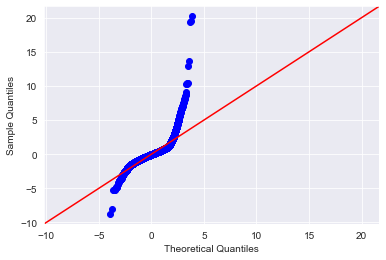

In [97]:
fig = sm.graphics.qqplot(model.resid, dist='norm', line='45', fit=True)

In [98]:
print(formula)
drops = ['id','price', 'sqft_above', 'floors', 'floors_1','grd_D','cond_4',
           'bathrooms', 'waterfront_N', 'jan_mar','floors_3_half','jul_sep',
           'oct_dec', 'quad_2']

price~bedrooms+sqft_living+sqft_lot+view+basement+yr_built+renovated+zipcode+lat+long+sqft_living15+sqft_lot15+waterfront_Y+floors_2+floors_3+day_of_year+quad_1+quad_3+quad_4+grd_F+grd_C+grd_B+grd_A+apr_jun+cond_1+cond_2+cond_3+cond_5


In [99]:
X = df5.drop(to_drop, axis=1)

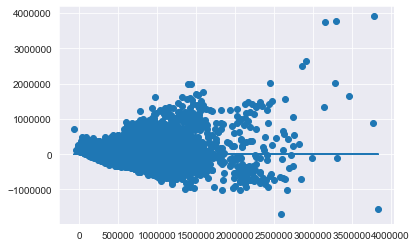

In [100]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df5))])

Plot shows signs of heteroscedasticity. Residuals are not distributed normally. 

<Figure size 576x360 with 0 Axes>

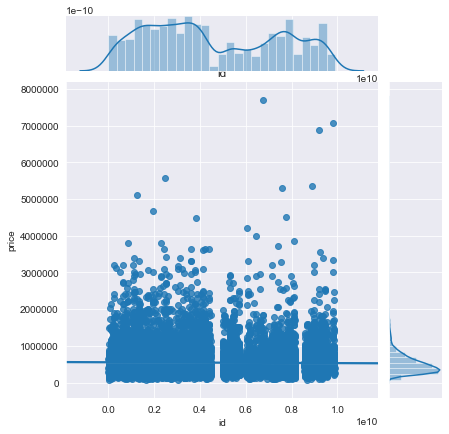

<Figure size 576x360 with 0 Axes>

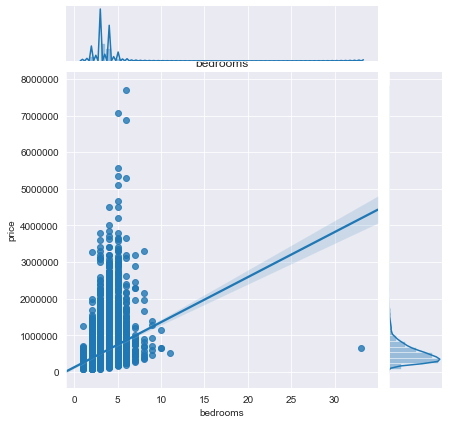

<Figure size 576x360 with 0 Axes>

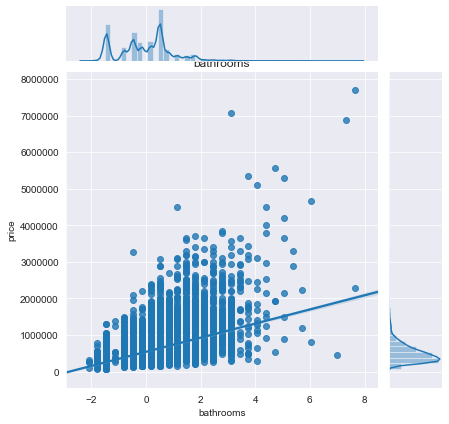

<Figure size 576x360 with 0 Axes>

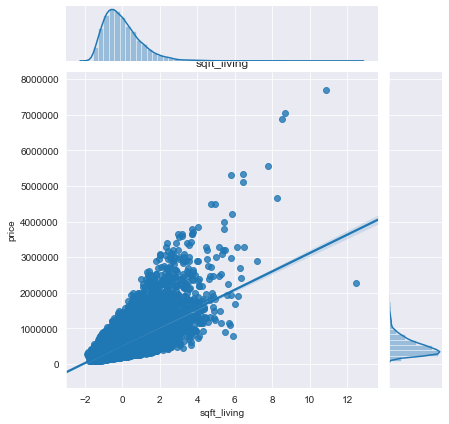

<Figure size 576x360 with 0 Axes>

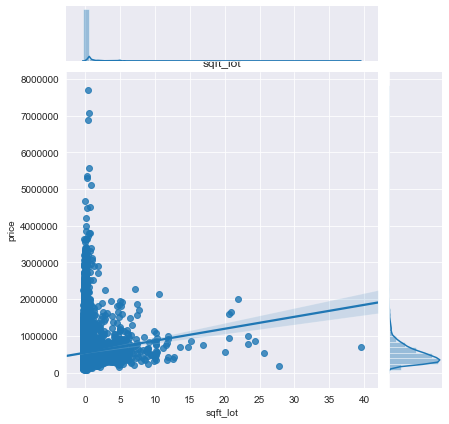

<Figure size 576x360 with 0 Axes>

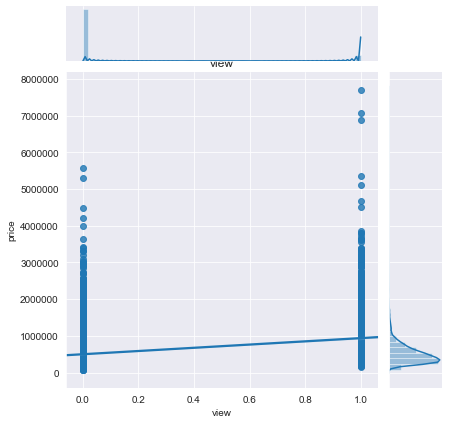

<Figure size 576x360 with 0 Axes>

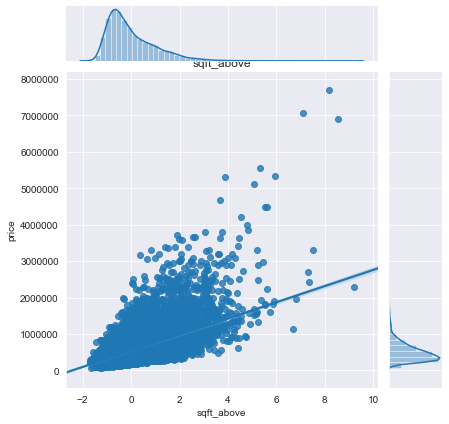

<Figure size 576x360 with 0 Axes>

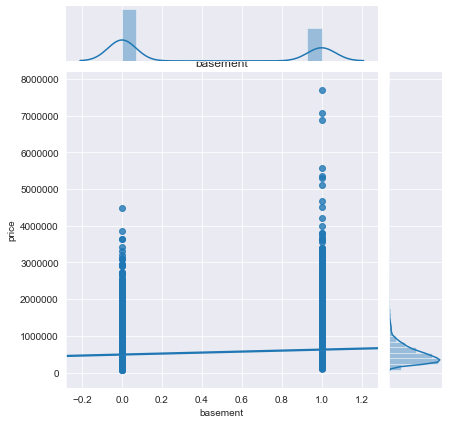

<Figure size 576x360 with 0 Axes>

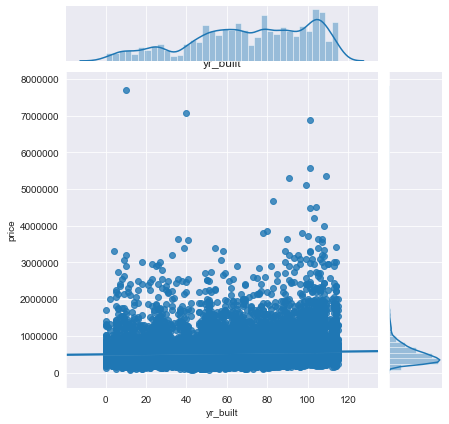

<Figure size 576x360 with 0 Axes>

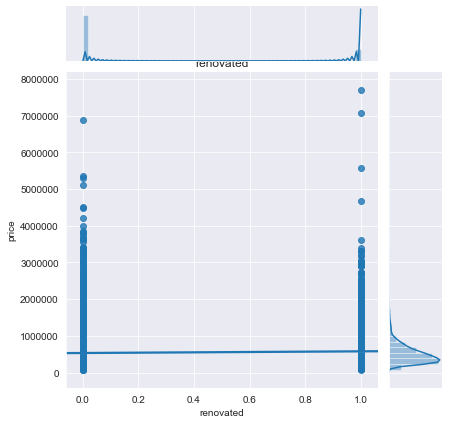

<Figure size 576x360 with 0 Axes>

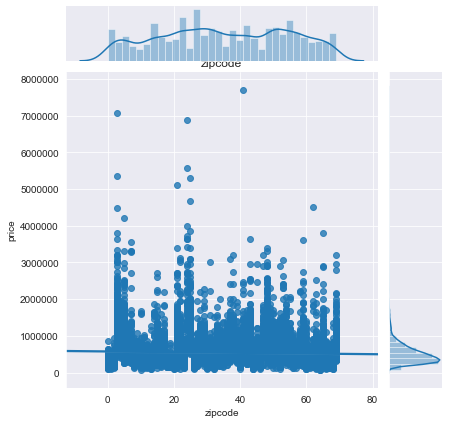

<Figure size 576x360 with 0 Axes>

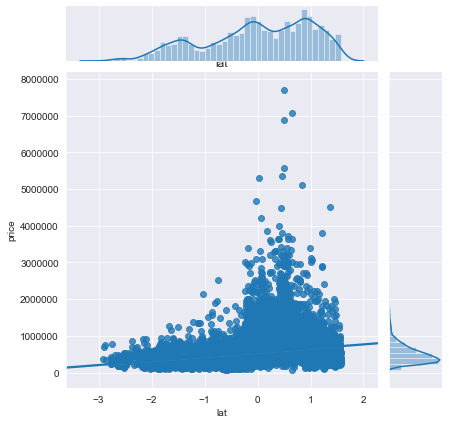

<Figure size 576x360 with 0 Axes>

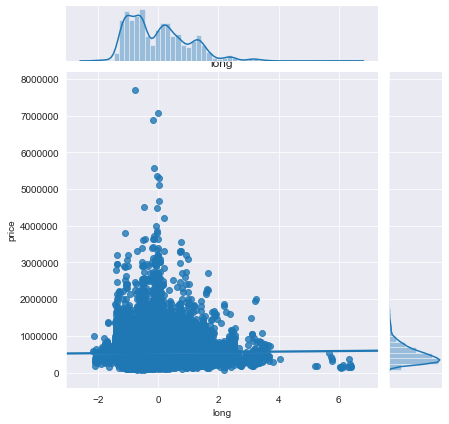

<Figure size 576x360 with 0 Axes>

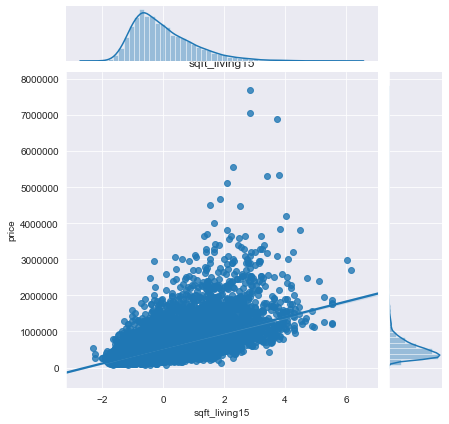

<Figure size 576x360 with 0 Axes>

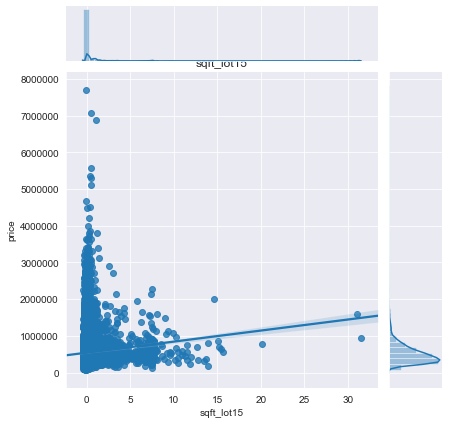

<Figure size 576x360 with 0 Axes>

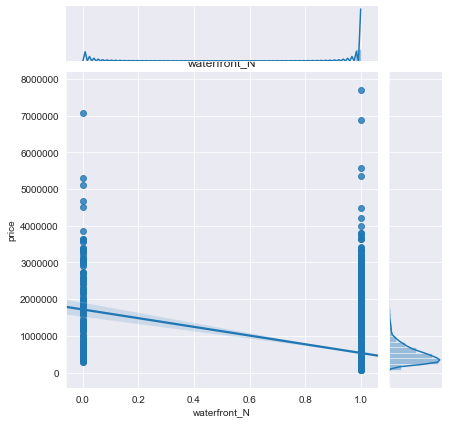

<Figure size 576x360 with 0 Axes>

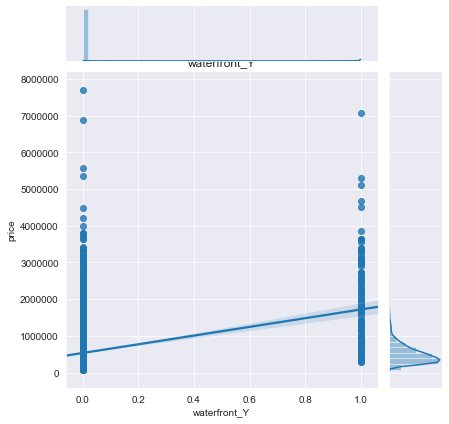

<Figure size 576x360 with 0 Axes>

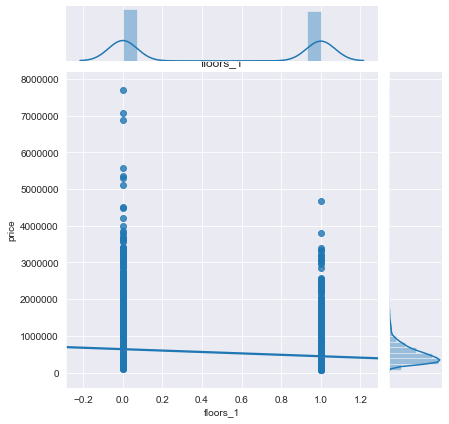

<Figure size 576x360 with 0 Axes>

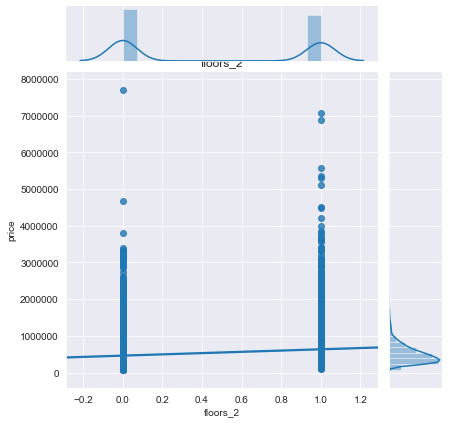

<Figure size 576x360 with 0 Axes>

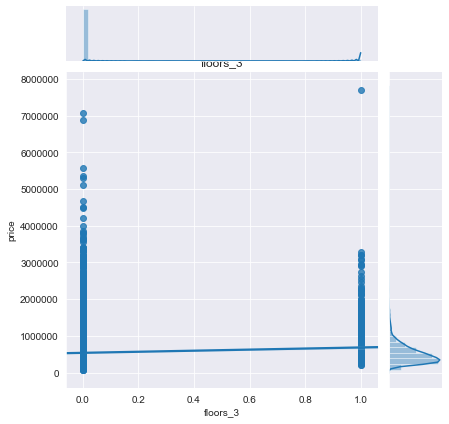

<Figure size 576x360 with 0 Axes>

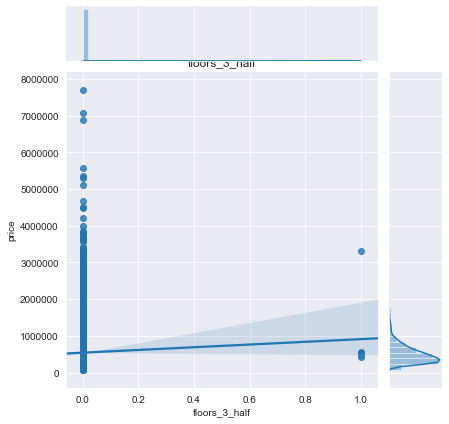

<Figure size 576x360 with 0 Axes>

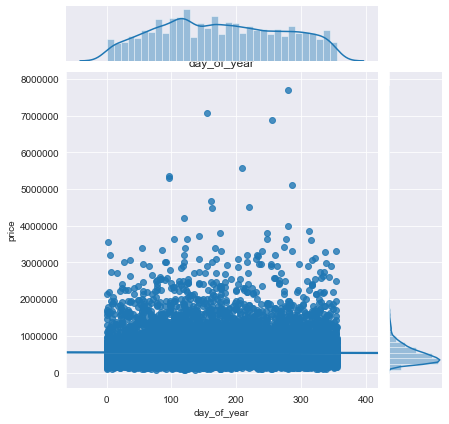

<Figure size 576x360 with 0 Axes>

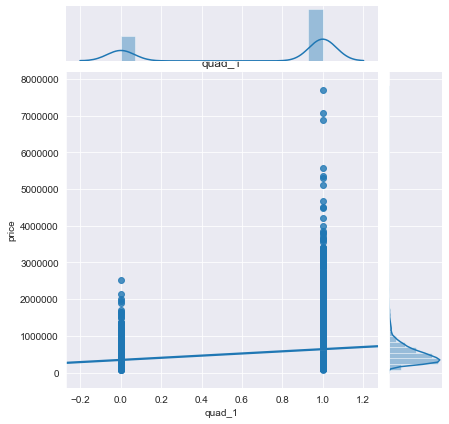

<Figure size 576x360 with 0 Axes>

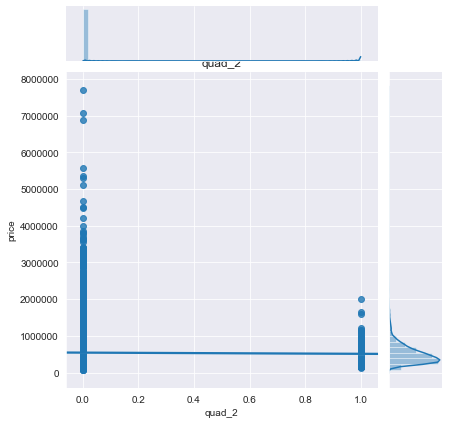

<Figure size 576x360 with 0 Axes>

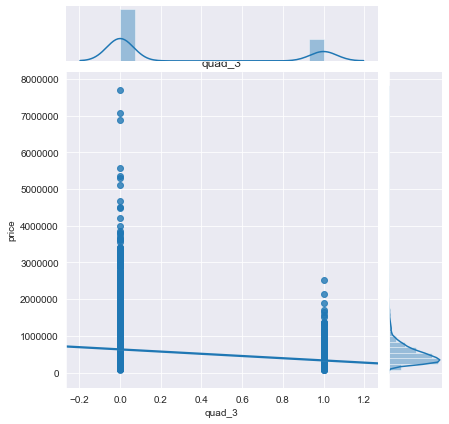

<Figure size 576x360 with 0 Axes>

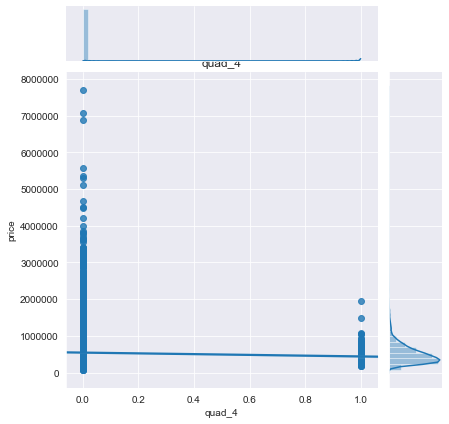

<Figure size 576x360 with 0 Axes>

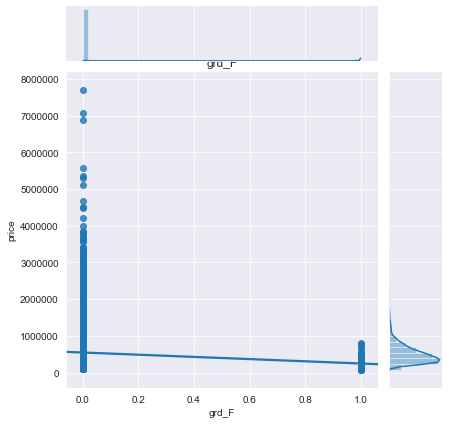

<Figure size 576x360 with 0 Axes>

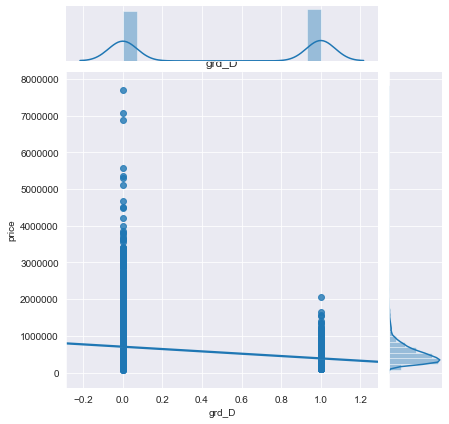

<Figure size 576x360 with 0 Axes>

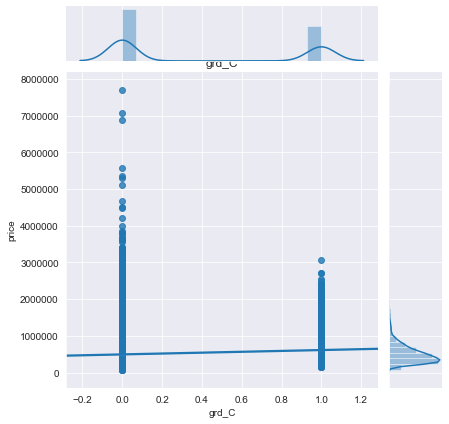

<Figure size 576x360 with 0 Axes>

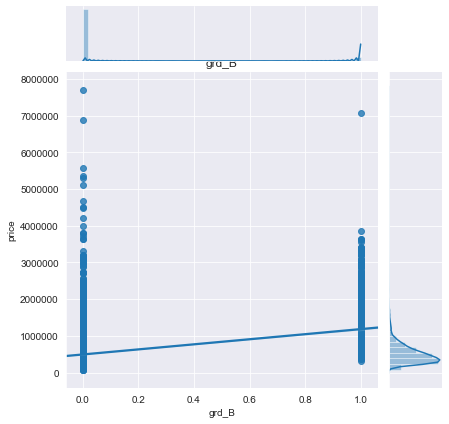

<Figure size 576x360 with 0 Axes>

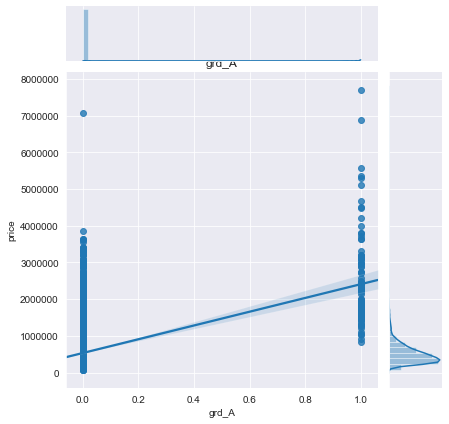

<Figure size 576x360 with 0 Axes>

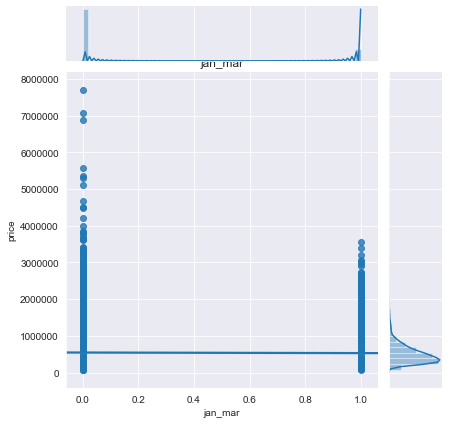

<Figure size 576x360 with 0 Axes>

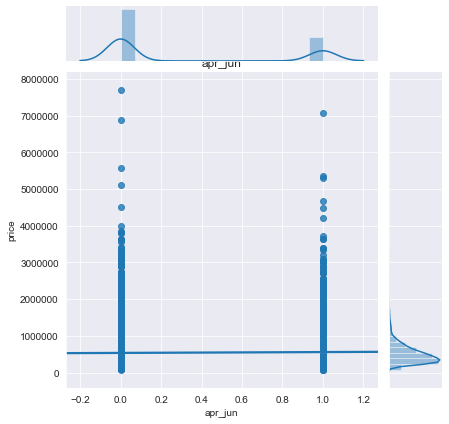

<Figure size 576x360 with 0 Axes>

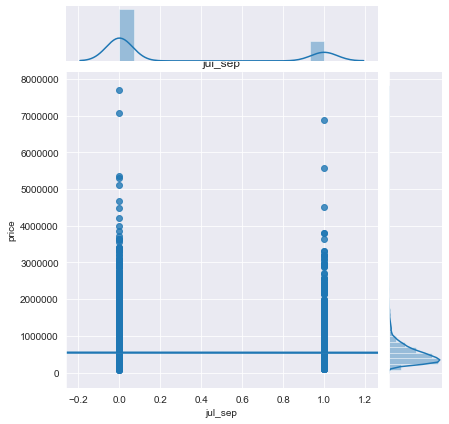

<Figure size 576x360 with 0 Axes>

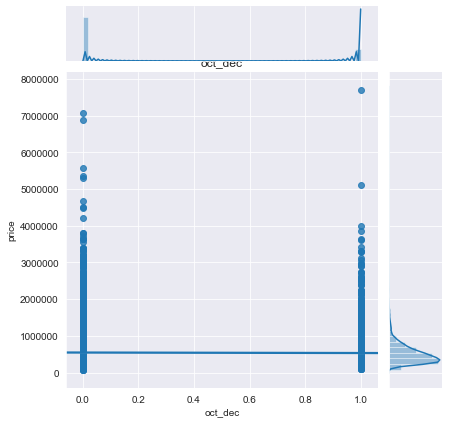

<Figure size 576x360 with 0 Axes>

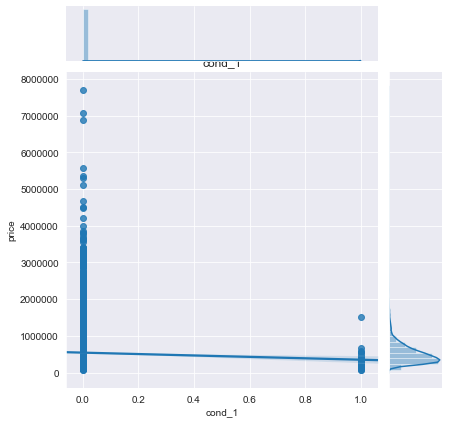

<Figure size 576x360 with 0 Axes>

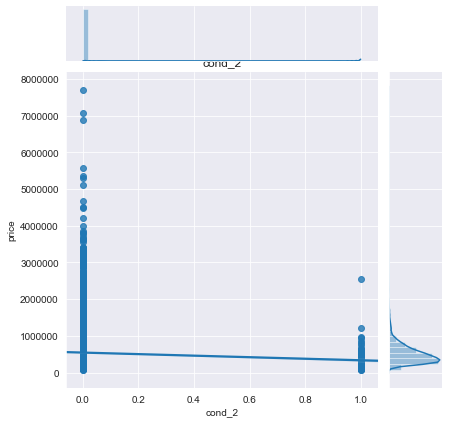

<Figure size 576x360 with 0 Axes>

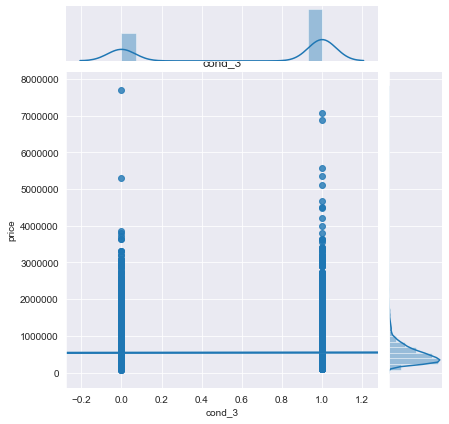

<Figure size 576x360 with 0 Axes>

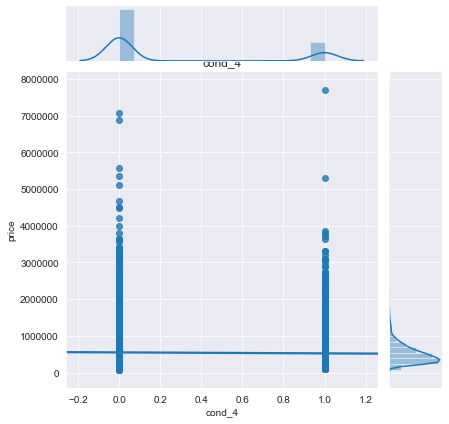

<Figure size 576x360 with 0 Axes>

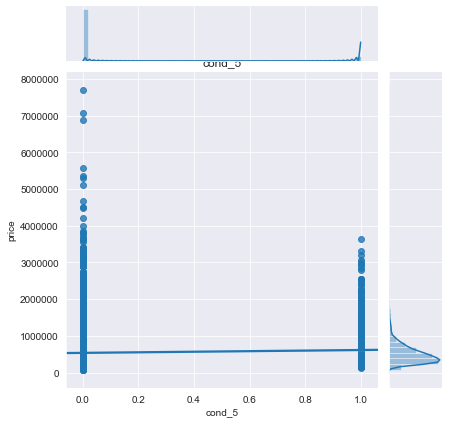

<Figure size 576x360 with 0 Axes>

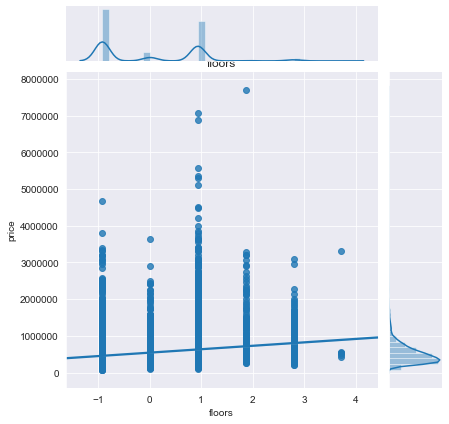

In [101]:
# using for loop to visualize relationship of the different columns to 'price'
no_price = df5.drop('price', axis=1)

for col in no_price.columns:
    plt.figure(figsize=(8,5))
    sns.jointplot(x= col, y= 'price', data=df5, kind='reg')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

In [102]:
# We'll store these values of predictors with low correlation to 
# eachother in X for use later
X = df5.drop(['price','quad_3','sqft_above','bathrooms', 
                  'sqft_living15','grd_C','cond_3','cond_2'], axis=1)

There are a lot of outliers, so we'll take care of them.

## Outliers

### Bedrooms

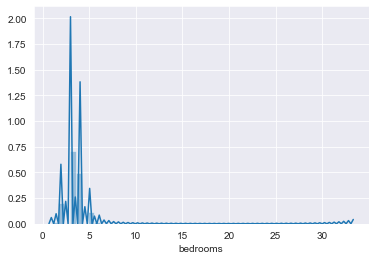

In [103]:
sns.distplot(df5['bedrooms'], kde=True)

In [104]:
df5.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [105]:
# using z-score to eliminate outliers 
df6 = df5.copy()
z = np.abs(stats.zscore(df6.bedrooms))
threshold = 3
df6 = df6[(z < 3)]

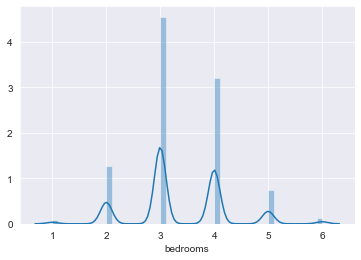

In [106]:
sns.distplot(df6['bedrooms'], label=col, kde=True)

In [107]:
# let's make this categorical
df6['bedrooms'] = df6['bedrooms'].astype('category')
df6['bedrooms'] = df6.bedrooms.cat.codes

In [108]:
df6.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  view  \
0  7129300520  221900.0         2  -1.451039    -0.980629 -0.228177     0   
1  6414100192  538000.0         2   0.174482     0.533357 -0.189735     0   
2  5631500400  180000.0         1  -1.451039    -1.427201 -0.123137     0   
3  2487200875  604000.0         3   1.149794    -0.131054 -0.243873     0   
4  1954400510  510000.0         2  -0.150622    -0.436030 -0.169499     0   

   sqft_above  basement  yr_built  ...  jan_mar  apr_jun  jul_sep  oct_dec  \
0   -0.735234         0        55  ...        0        0        0        1   
1    0.460766         1        51  ...        0        0        0        1   
2   -1.230546         0        33  ...        1        0        0        0   
3   -0.892284         1        65  ...        0        0        0        1   
4   -0.131194         0        87  ...        1        0        0        0   

   cond_1  cond_2  cond_3  cond_4  cond_5    floors  
0       0       0       1       0       0 -0.915531  
1       0       0       1       0       0  0.937409  
2       0       0       1       0       0 -0.915531  
3       0       0       0       0       1 -0.915531  
4       0       0       1       0       0 -0.915531  

[5 rows x 42 columns]

### Bathrooms

In [109]:
df6.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
view             0
sqft_above       0
basement         0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront_N     0
waterfront_Y     0
floors_1         0
floors_2         0
floors_3         0
floors_3_half    0
day_of_year      0
quad_1           0
quad_2           0
quad_3           0
quad_4           0
grd_F            0
grd_D            0
grd_C            0
grd_B            0
grd_A            0
jan_mar          0
apr_jun          0
jul_sep          0
oct_dec          0
cond_1           0
cond_2           0
cond_3           0
cond_4           0
cond_5           0
floors           0
dtype: int64

 0.499586    5349
-1.451039    3793
-0.475727    3019
 0.174482    2028
-0.150622    1912
-0.800831    1427
 0.824690    1176
 1.149794     738
 1.800003     723
 1.474898     584
 2.125107     152
 2.450211     126
 3.100419      94
 2.775315      77
-1.776143      70
 3.425523      21
 3.750628      20
 4.075732      12
 4.400836       9
-1.125935       9
 5.051044       5
-2.101247       4
 4.725940       3
 5.701253       2
 5.376148       2
 7.326773       1
 7.651878       1
 6.026357       1
Name: bathrooms, dtype: int64

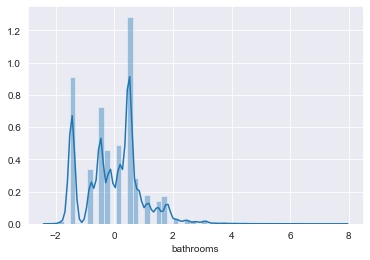

In [110]:
sns.distplot(df6['bathrooms'], label=col, kde=True)
df6.bathrooms.value_counts()

In [111]:
# We'll just do some trimming
df6 = df6[df6['bathrooms'] <= 4.00]

 0.499586    5349
-1.451039    3793
-0.475727    3019
 0.174482    2028
-0.150622    1912
-0.800831    1427
 0.824690    1176
 1.149794     738
 1.800003     723
 1.474898     584
 2.125107     152
 2.450211     126
 3.100419      94
 2.775315      77
-1.776143      70
 3.425523      21
 3.750628      20
-1.125935       9
-2.101247       4
Name: bathrooms, dtype: int64

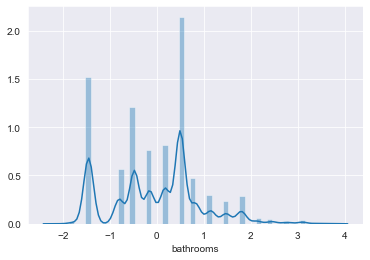

In [112]:
sns.distplot(df6['bathrooms'], label=col, kde=True)
df6.bathrooms.value_counts()

### Sqft_living

count    21322.000000
mean        -0.010934
std          0.967429
min         -1.862880
25%         -0.708330
50%         -0.185514
75%          0.500681
max          8.669671
Name: sqft_living, dtype: float64

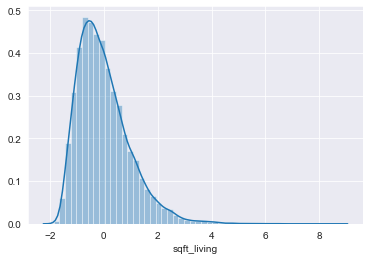

In [113]:
sns.distplot(df6['sqft_living'], label=col, kde=True)
df6.sqft_living.describe()

In [114]:
# We'll use the z-score again, but this data is pretty normal (thankfully)
z = np.abs(stats.zscore(df6.sqft_living))
threshold = 3
df6 = df6[(z < 3)]

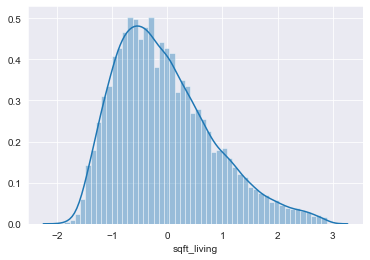

In [115]:
sns.distplot(df6['sqft_living'], label=col, kde=True)

### Sqft_lot

array([-0.22817694, -0.18973457, -0.12313654, ..., -0.22424094,
       -0.30694517, -0.33862632])

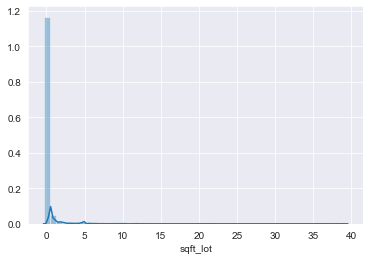

In [116]:
sns.distplot(df6['sqft_lot'], label=col, kde=True)
df6.sqft_lot.unique()

In [117]:
z = np.abs(stats.zscore(df6.sqft_lot))
threshold = 3
df6 = df6[(z < 3)]

count    20765.000000
mean        -0.106259
std          0.321597
min         -0.352052
25%         -0.243873
50%         -0.183505
75%         -0.116858
max          2.882927
Name: sqft_lot, dtype: float64

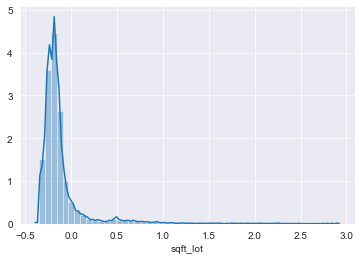

In [118]:
sns.distplot(df6['sqft_lot'], label=col, kde=True)
df6.sqft_lot.describe()

It's a marked improvement, but if this graph represents 3 standard  deviations, it might be worth dropping entirely

### Sqft_lot15

count    20765.000000
mean        -0.088687
std          0.574133
min         -0.443906
25%         -0.282839
50%         -0.191802
75%         -0.106300
max         15.471250
Name: sqft_lot15, dtype: float64

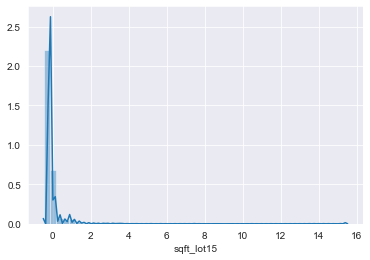

In [119]:
sns.distplot(df6['sqft_lot15'], label=col, kde=True)
df6.sqft_lot15.describe()

In [120]:
z = np.abs(stats.zscore(df6.sqft_lot15))
threshold = 3
df6 = df6[(z < 3)]

count    20490.000000
mean        -0.137987
std          0.281313
min         -0.443906
25%         -0.283793
50%         -0.192792
75%         -0.110297
max          1.627227
Name: sqft_lot15, dtype: float64

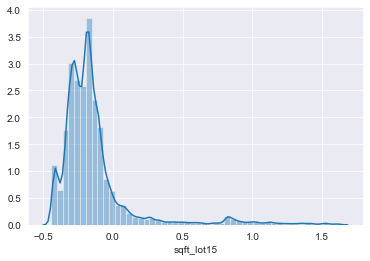

In [121]:
sns.distplot(df6['sqft_lot15'], label=col, kde=True)
df6.sqft_lot15.describe()

Much better than sqft_lot

## Checking Effect

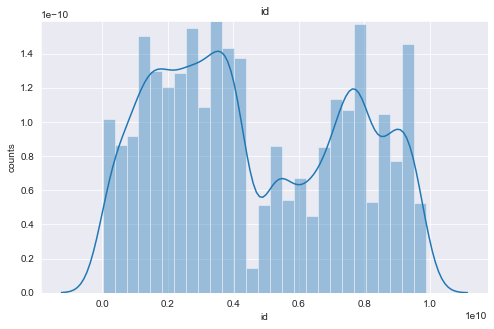

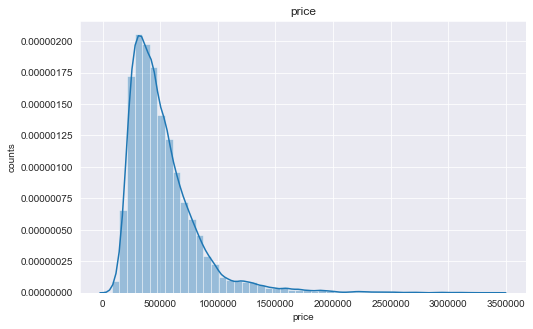

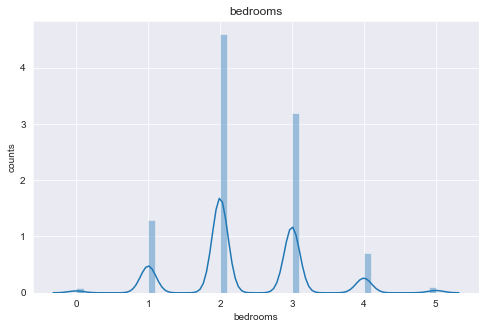

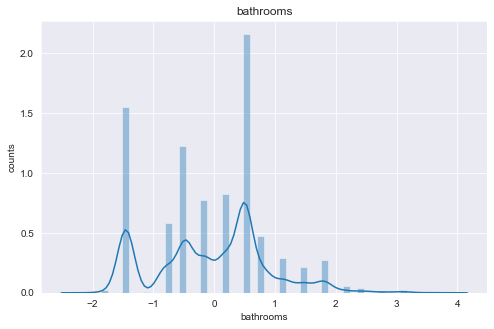

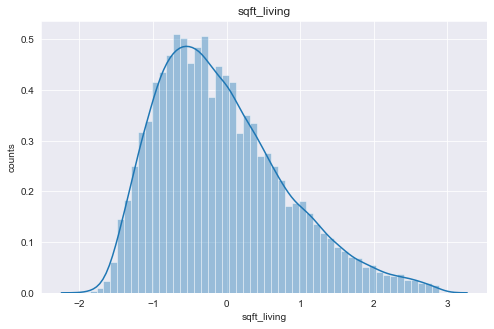

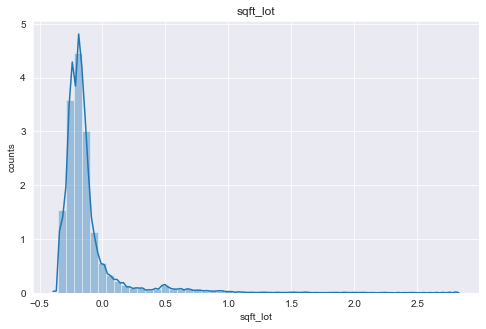

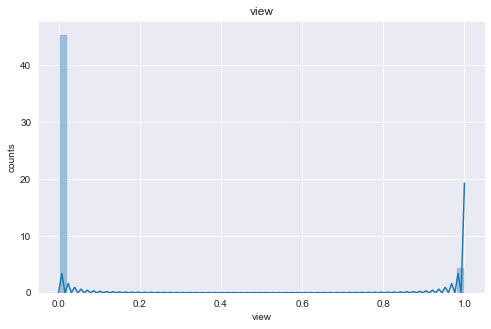

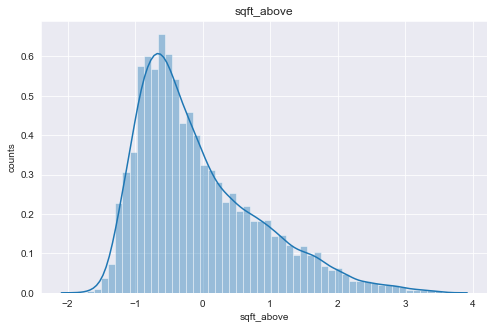

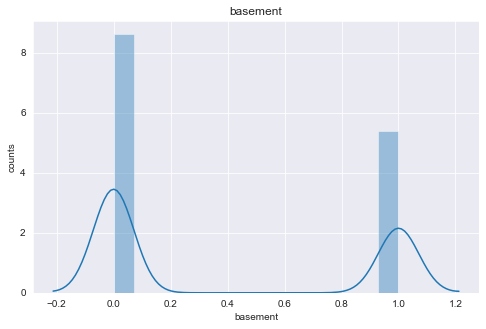

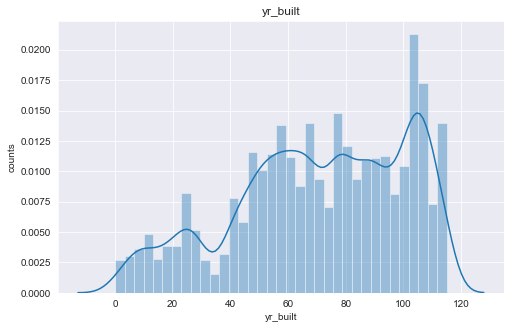

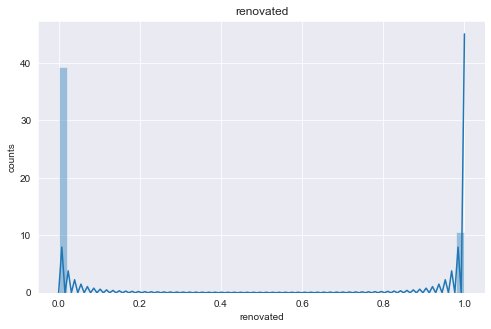

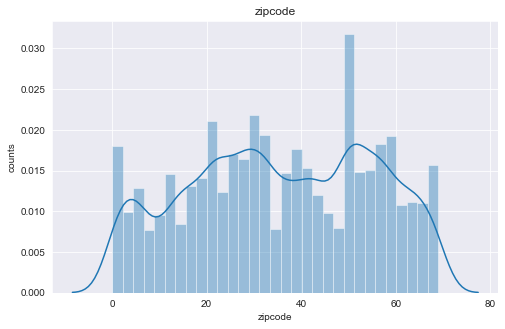

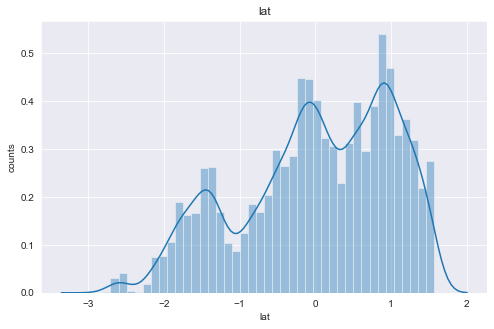

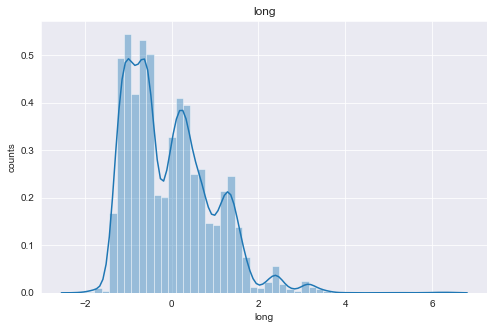

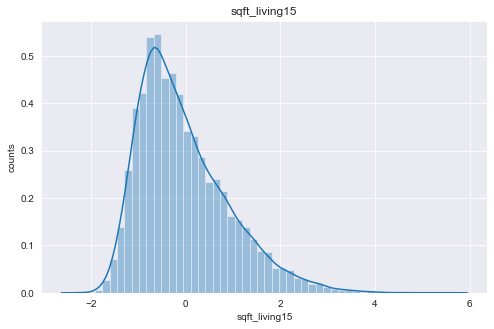

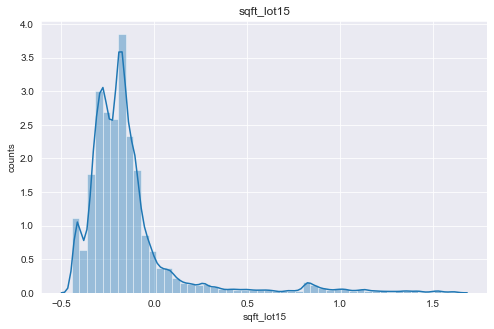

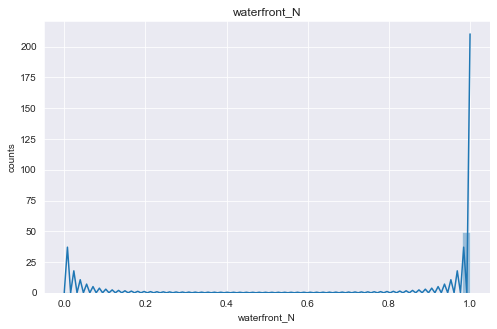

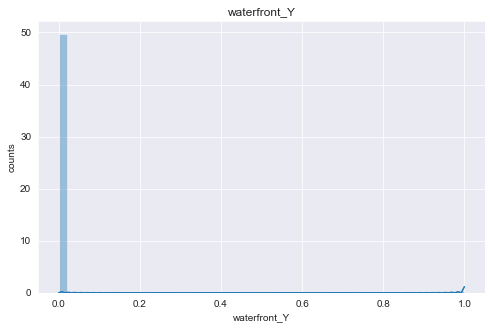

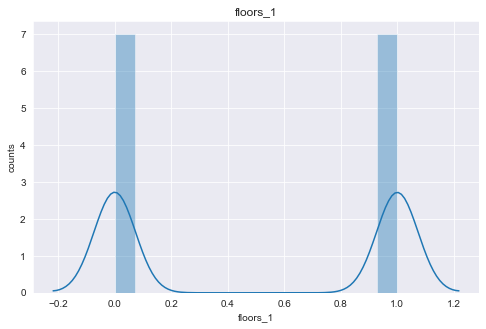

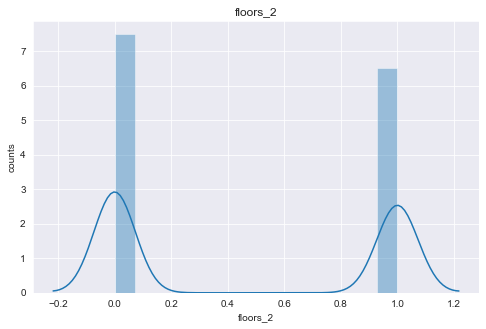

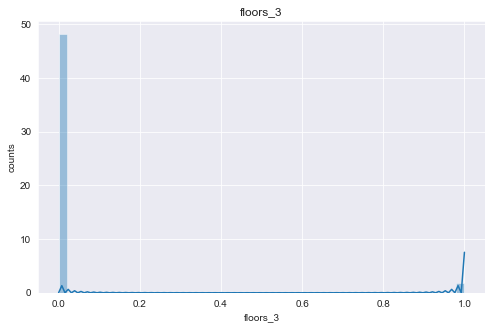

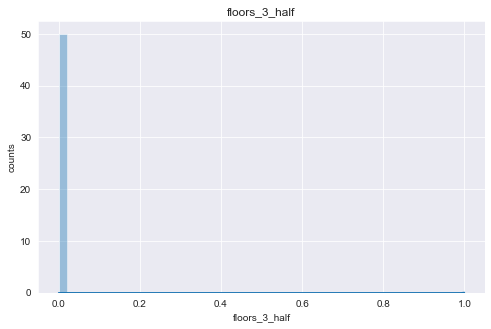

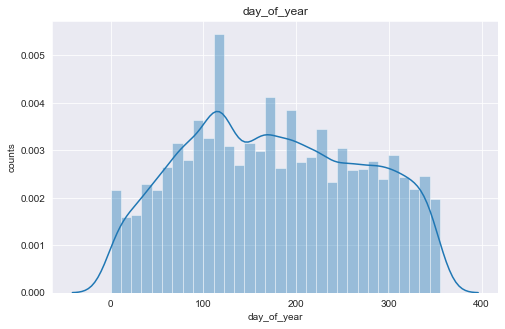

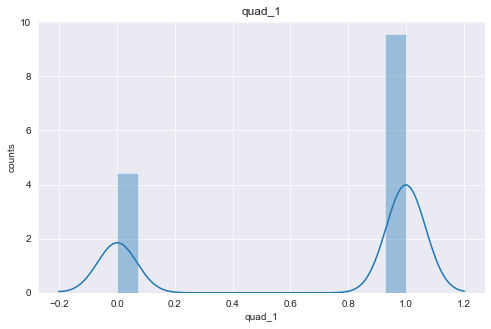

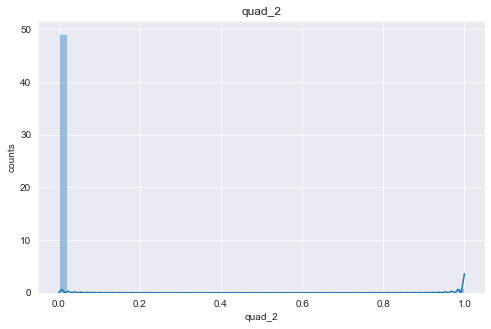

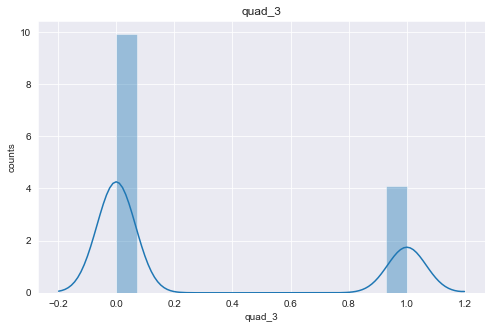

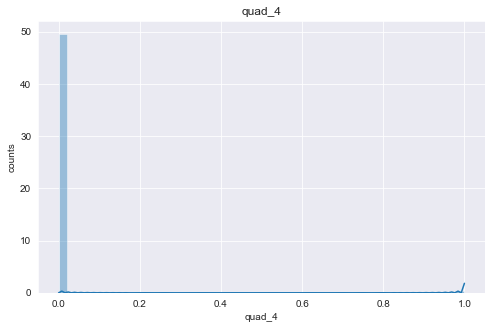

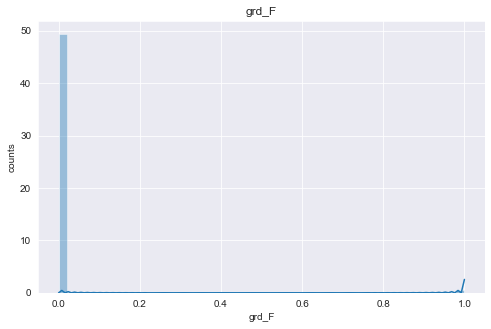

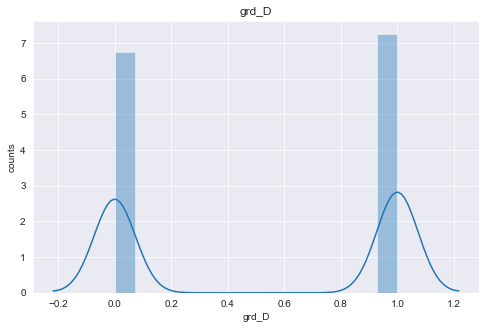

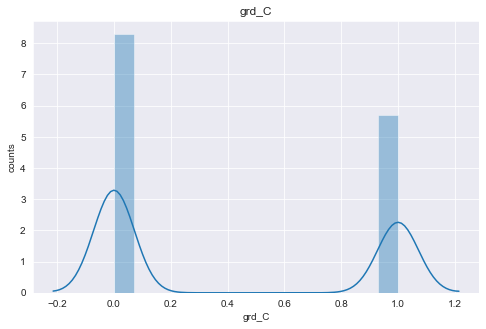

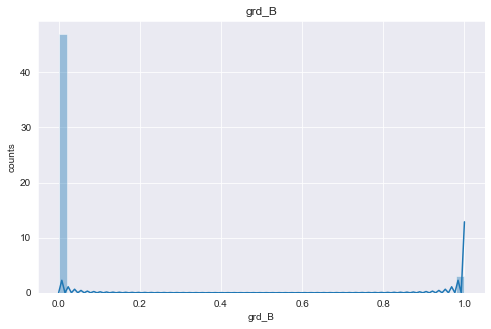

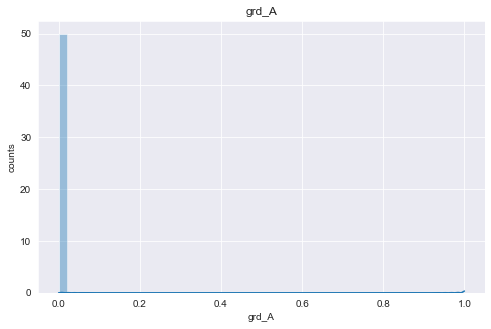

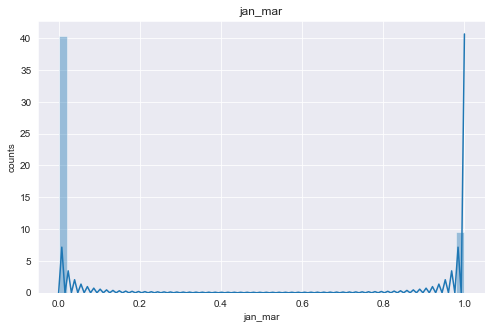

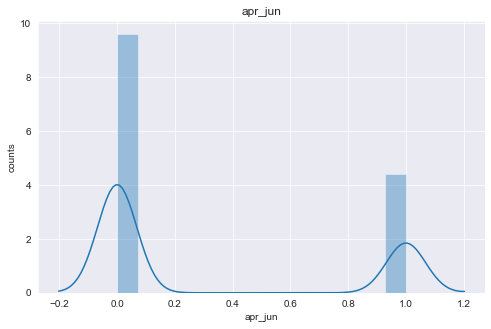

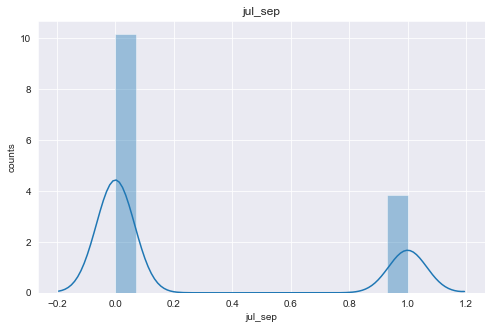

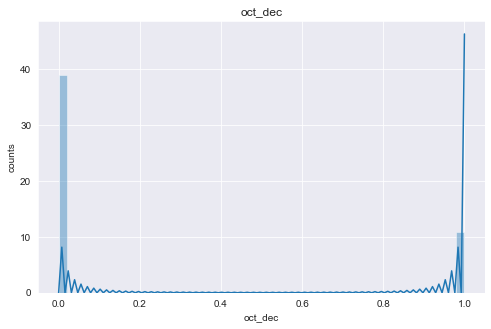

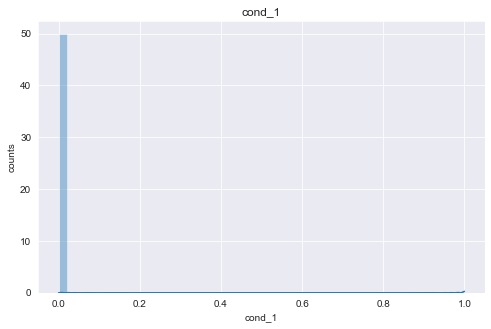

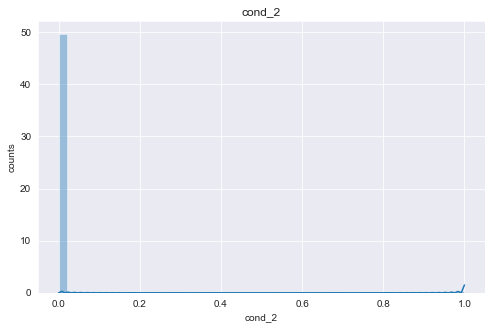

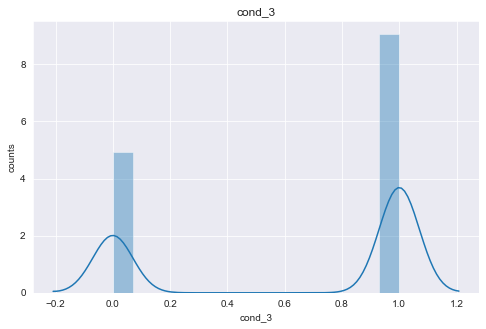

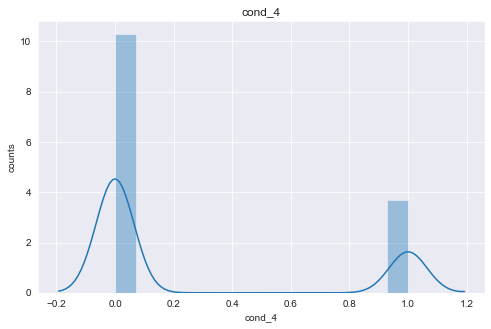

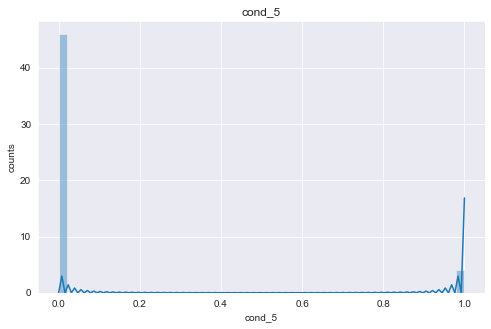

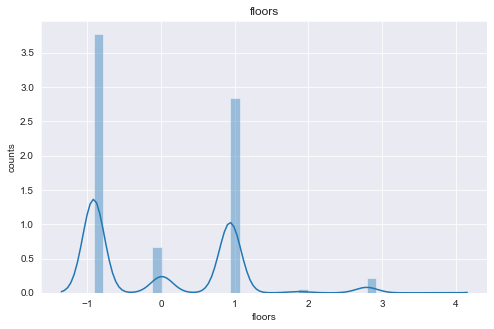

In [122]:
for col in df6.columns:
    plt.figure(figsize=(8,5))
    sns.distplot(df6[col], label=col, kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

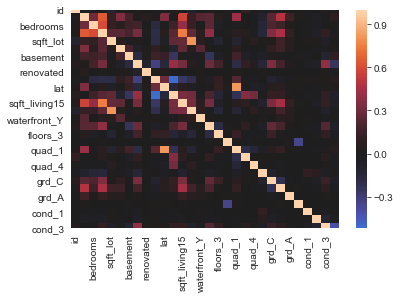

In [123]:
# Checking effect

new_test = df6.drop(['sqft_above', 'floors', 'floors_1','quad_3','grd_D',
                     'cond_4','bathrooms', 'waterfront_N', 'jan_mar',
                     'floors_3_half','jul_sep','oct_dec'], axis=1)

sns.heatmap(new_test.corr(), center=0)


In [124]:
corr_pairs = new_test.corr().abs().stack().reset_index().sort_values(0, 
                                                                ascending=False)
corr_pairs['pairs'] = list(zip(corr_pairs.level_0, corr_pairs.level_1))

pairs_index = corr_pairs.set_index(['pairs'])

pairs = pairs_index.drop(columns=['level_0', 'level_1'])

pairs.columns = ['correlation']

unique_pairs = pairs.drop_duplicates()

In [125]:
unique_pairs[(unique_pairs.correlation>0.75) & (unique_pairs.correlation<1)]

correlation
pairs                                    
(lat, quad_1)                    0.822753
(sqft_lot15, sqft_lot)           0.811183
(sqft_living15, sqft_living)     0.756857

In [126]:
# We know from the plot of latitude earlier that it plays a significant role 
# in price. We already mentioned dropping sqft_lot and we'll play around with 
# dropping quad_3

target = 'price'

feats = new_test.drop(['price','sqft_lot','basement','apr_jun', 'id'
                       ], axis=1).columns

preds = '+'.join(feats)

formula2 = target + '~' + preds
model3 = smf.ols(formula=formula2, data=new_test).fit()
model3.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS                 Adj. R-squared:        0.704      
Dependent Variable:     price               AIC:                   551264.8526
Date:                   2020-07-20 16:30    BIC:                   551470.9726
No. Observations:       20490               Log-Likelihood:        -2.7561e+05
Df Model:               25                  F-statistic:           1952.      
Df Residuals:           20464               Prob (F-statistic):    0.00       
R-squared:              0.705               Scale:                 2.8267e+10 
------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------
Intercept      554945.0961  8348.2686  66.4743 0.0000  538581.8226 571308.3697
bedrooms       -16186.6938  1781.5937  -9.0855 0.0000  -19678.7598 -12694.6279
sqft_living    141936.4246  2668.1267  53.1970 0.0000  136706.6830 147166.1662
view           109759.3443  4553.7568  24.1030 0.0000  100833.6170 118685.0716
yr_built        -1492.2585    56.2715 -26.5189 0.0000   -1602.5551  -1381.9619
renovated       18584.8967  2899.2033   6.4103 0.0000   12902.2266  24267.5668
zipcode         -1415.9551    79.1911 -17.8802 0.0000   -1571.1759  -1260.7343
lat             25751.6861  2263.3919  11.3775 0.0000   21315.2572  30188.1150
long           -30292.9978  1885.0120 -16.0705 0.0000  -33987.7719 -26598.2237
sqft_living15   43842.1648  2123.5186  20.6460 0.0000   39679.8987  48004.4308
sqft_lot15     -31365.6972  4837.4422  -6.4839 0.0000  -40847.4706 -21883.9238
waterfront_Y   590821.9994 16363.9042  36.1052 0.0000  558747.4394 622896.5595
floors_2        24979.8437  2822.7118   8.8496 0.0000   19447.1030  30512.5843
floors_3        81110.4226  7088.2694  11.4429 0.0000   67216.8480  95003.9971
day_of_year      -109.5556    12.4414  -8.8057 0.0000    -133.9417    -85.1695
quad_1         168892.7133  4987.4907  33.8633 0.0000  159116.8330 178668.5936
quad_2         127295.2310 10667.9988  11.9324 0.0000  106385.1008 148205.3613
quad_4         190596.5571 14132.0414  13.4868 0.0000  162896.6265 218296.4877
grd_F          -32702.0061 11121.0490  -2.9406 0.0033  -54500.1510 -10903.8613
grd_C           73935.9192  3282.3758  22.5251 0.0000   67502.2004  80369.6381
grd_B          313785.7370  6954.1241  45.1223 0.0000  300155.0980 327416.3761
grd_A          695490.8182 30203.4045  23.0269 0.0000  636289.7316 754691.9048
cond_1        -103980.0788 32651.8821  -3.1845 0.0015 -167980.3772 -39979.7805
cond_2         -45975.3341 14214.1412  -3.2345 0.0012  -73836.1868 -18114.4813
cond_3         -28524.4756  2979.8876  -9.5723 0.0000  -34365.2934 -22683.6578
cond_5          42904.2879  4805.0688   8.9290 0.0000   33485.9691  52322.6067
------------------------------------------------------------------------------
Omnibus:                10751.496         Durbin-Watson:            1.991     
Prob(Omnibus):          0.000             Jarque-Bera (JB):         179656.353
Skew:                   2.140             Prob(JB):                 0.000     
Kurtosis:               16.861            Condition No.:            5922      
==============================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

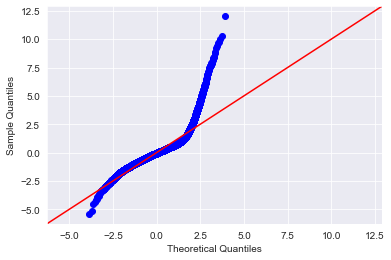

In [127]:
fig = sm.graphics.qqplot(model3.resid, dist='norm', line='45', fit=True)

#### Note: I've re-run the above cell multiple times and have found that any further removal or addition of our current variables results in no positive change to R-squared and overall fit. 

## Transformations

In [128]:
df7 = new_test.copy()
df7= df7.drop(['sqft_lot','basement','apr_jun'], axis=1)

In [129]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 21596
Data columns (total 27 columns):
id               20490 non-null int64
price            20490 non-null float64
bedrooms         20490 non-null int8
sqft_living      20490 non-null float64
view             20490 non-null int8
yr_built         20490 non-null int8
renovated        20490 non-null int8
zipcode          20490 non-null int8
lat              20490 non-null float64
long             20490 non-null float64
sqft_living15    20490 non-null float64
sqft_lot15       20490 non-null float64
waterfront_Y     20490 non-null int32
floors_2         20490 non-null int8
floors_3         20490 non-null int8
day_of_year      20490 non-null int16
quad_1           20490 non-null int8
quad_2           20490 non-null int8
quad_4           20490 non-null int8
grd_F            20490 non-null int8
grd_C            20490 non-null int8
grd_B            20490 non-null int8
grd_A            20490 non-null int8
cond_1           20

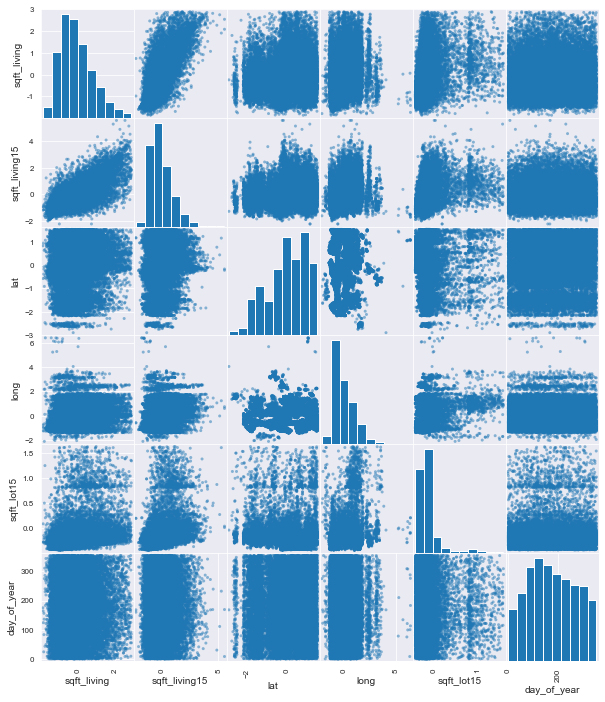

In [130]:
possible_logs = ['sqft_living'
                 ,'sqft_living15',
                 'lat','long','sqft_lot15','day_of_year']
pd.plotting.scatter_matrix(df7[possible_logs], figsize=(10,12));

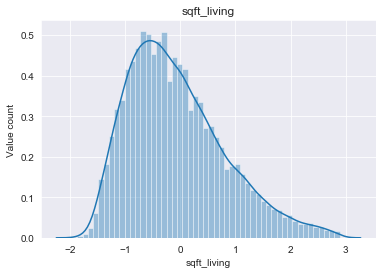

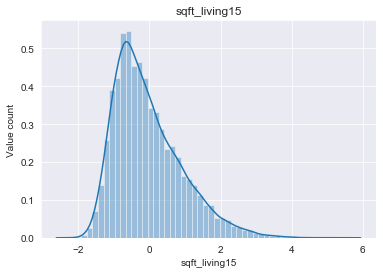

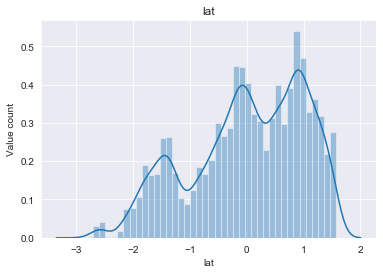

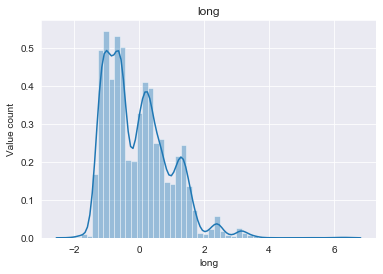

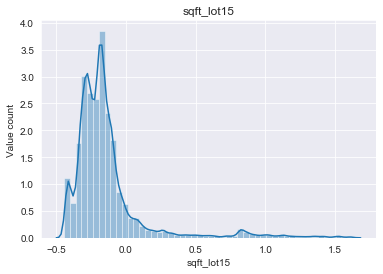

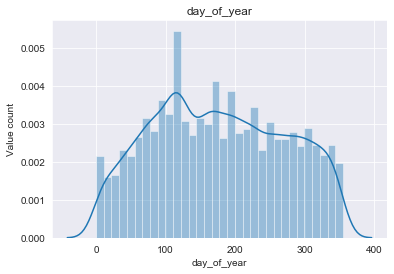

In [131]:
for col in df7[possible_logs]: 
    sns.distplot(df7[col], label=col, kde=True, norm_hist=True)
    plt.xlabel(col)
    plt.ylabel('Value count')
    plt.title(col)
    plt.show()

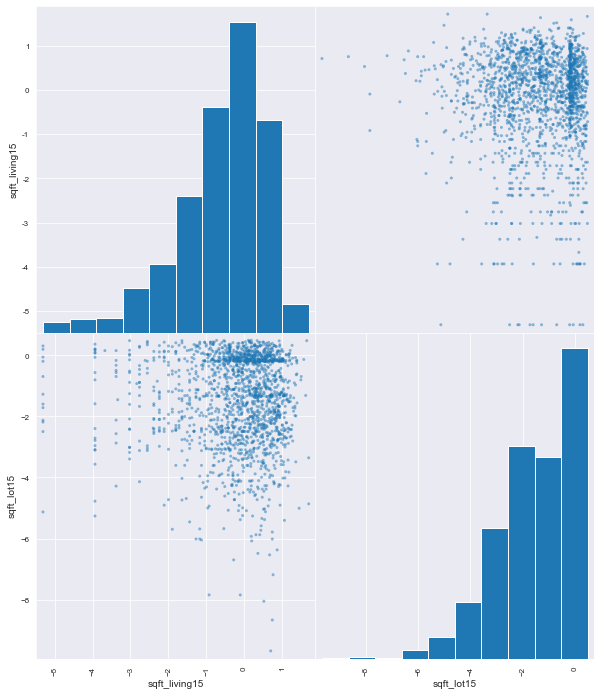

In [132]:
revised_logs = ['sqft_living15',
                'sqft_lot15']
for log in revised_logs:
    df7[log] = df7[log].map(lambda x : np.log(x))
    df7[log] = df7[log].rename({log : 'log_'+log})
pd.plotting.scatter_matrix(df7[revised_logs], figsize=(10,12));

In [133]:
log_df7 = df7.rename({
                      'sqft_living15':'log_sqft_living15',
                      'sqft_lot15':'log_sqft_lot15'}, axis=1)

In [140]:
target = 'price'

feats = log_df7.drop(['price','id'], axis=1).columns

preds = '+'.join(feats)

formula2 = target + '~' + preds
model4 = smf.ols(formula=formula2, data=log_df7).fit()
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                   OLS                   Adj. R-squared:          0.656     
Dependent Variable:      price                 AIC:                     50508.7152
Date:                    2020-07-20 16:34      BIC:                     50651.7864
No. Observations:        1813                  Log-Likelihood:          -25228.   
Df Model:                25                    F-statistic:             139.0     
Df Residuals:            1787                  Prob (F-statistic):      0.00      
R-squared:               0.660                 Scale:                   7.2516e+10
----------------------------------------------------------------------------------
                     Coef.      Std.Err.     t     P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------------
Intercept         636328.7633  52319.1748  12.1624 0.0000  533715.5641 738941.9625
bedrooms           -5695.8735   9417.4491  -0.6048 0.5454  -24166.2448  12774.4978
sqft_living       182942.2047  11445.0569  15.9844 0.0000  160495.1017 205389.3076
view               94801.2387  18755.0239   5.0547 0.0000   58017.1531 131585.3242
yr_built           -2386.6207    481.7960  -4.9536 0.0000   -3331.5635  -1441.6779
renovated          64098.4021  15399.2543   4.1624 0.0000   33895.9619  94300.8422
zipcode            -4212.9750    419.5862 -10.0408 0.0000   -5035.9062  -3390.0439
lat               -36807.3596  13277.4376  -2.7722 0.0056  -62848.2969 -10766.4224
long              -84696.1798  10170.8317  -8.3274 0.0000 -104644.1546 -64748.2049
log_sqft_living15  32592.2115   7581.9227   4.2987 0.0000   17721.8442  47462.5788
log_sqft_lot15     12692.0644   4724.4576   2.6865 0.0073    3426.0216  21958.1071
waterfront_Y      720188.0345  40029.8694  17.9913 0.0000  641677.7566 798698.3125
floors_2          -16026.0212  14870.2482  -1.0777 0.2813  -45190.9258  13138.8834
floors_3            8783.2505  66625.3973   0.1318 0.8951 -121888.6338 139455.1348
day_of_year         -126.4598     69.4626  -1.8205 0.0688    -262.6963      9.7766
quad_1            401557.0433  30615.3474  13.1162 0.0000  341511.3955 461602.6911
quad_2            399021.2487  81638.6479   4.8877 0.0000  238903.9902 559138.5072
quad_4            477856.9528  65304.2078   7.3174 0.0000  349776.3072 605937.5983
grd_F              -9830.9784 104628.4208  -0.0940 0.9252 -215037.9033 195375.9465
grd_C              66886.6857  21397.9711   3.1258 0.0018   24919.0080 108854.3635
grd_B             231367.9090  30264.2547   7.6449 0.0000  172010.8568 290724.9612
grd_A             496491.5476  65782.9214   7.5474 0.0000  367472.0048 625511.0903
cond_1            286966.3194 191948.0453   1.4950 0.1351  -89499.9202 663432.5590
cond_2            -73068.2614  96485.1374  -0.7573 0.4490 -262303.8267 116167.3038
cond_3            -51472.3399  15002.2973  -3.4310 0.0006  -80896.2315 -22048.4484
cond_5             39424.6874  28244.1990   1.3959 0.1629  -15970.4449  94819.8198
----------------------------------------------------------------------------------
Omnibus:                  559.409            Durbin-Watson:               1.927   
Prob(Omnibus):            0.000              Jarque-Bera (JB):            2470.797
Skew:                     1.415              Prob(JB):                    0.000   
Kurtosis:                 7.970              Condition No.:               6422    
==================================================================================
* The condition number is large (6e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

### Result of Applying Log Transformation
Although skew and kurtosis have improved, standard error has increased in many areas and our adjusted r-squared value has dropped considerably.  We'll revert back to the model we used after removing outliers, as it is a good middle ground.

In [135]:
# reverting to previous data frame
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 21596
Data columns (total 30 columns):
id               20490 non-null int64
price            20490 non-null float64
bedrooms         20490 non-null int8
sqft_living      20490 non-null float64
sqft_lot         20490 non-null float64
view             20490 non-null int8
basement         20490 non-null int8
yr_built         20490 non-null int8
renovated        20490 non-null int8
zipcode          20490 non-null int8
lat              20490 non-null float64
long             20490 non-null float64
sqft_living15    20490 non-null float64
sqft_lot15       20490 non-null float64
waterfront_Y     20490 non-null int32
floors_2         20490 non-null int8
floors_3         20490 non-null int8
day_of_year      20490 non-null int16
quad_1           20490 non-null int8
quad_2           20490 non-null int8
quad_4           20490 non-null int8
grd_F            20490 non-null int8
grd_C            20490 non-null int8
grd_B           

In [137]:
df8 = new_test.drop(['sqft_lot','basement','apr_jun', 'id'], axis=1)
df8.head()

price  bedrooms  sqft_living  view  yr_built  renovated  zipcode  \
0  221900.0         2    -0.980629     0        55          0       66   
1  538000.0         2     0.533357     0        51          1       55   
2  180000.0         1    -1.427201     0        33          1       16   
3  604000.0         3    -0.131054     0        65          0       58   
4  510000.0         2    -0.436030     0        87          0       37   

        lat      long  sqft_living15  ...  quad_2  quad_4  grd_F  grd_C  \
0 -0.352886 -0.305688      -0.943654  ...       0       0      0      0   
1  1.161349 -0.746268      -0.432877  ...       0       0      0      0   
2  1.283325 -0.135141       1.070267  ...       0       0      0      0   
3 -0.283598 -1.272122      -0.914467  ...       0       0      0      0   
4  0.409284  1.200812      -0.272347  ...       0       0      0      1   

   grd_B  grd_A  cond_1  cond_2  cond_3  cond_5  
0      0      0       0       0       1       0  
1      0      0       0       0       1       0  
2      0      0       0       0       1       0  
3      0      0       0       0       0       1  
4      0      0       0       0       1       0  

[5 rows x 26 columns]

In [139]:
target = 'price'

feats = df8.drop(['price'], axis=1).columns

preds = '+'.join(feats)

formula = target + '~' + preds
model = smf.ols(formula=formula, data=df8).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS                 Adj. R-squared:        0.704      
Dependent Variable:     price               AIC:                   551264.8526
Date:                   2020-07-20 16:33    BIC:                   551470.9726
No. Observations:       20490               Log-Likelihood:        -2.7561e+05
Df Model:               25                  F-statistic:           1952.      
Df Residuals:           20464               Prob (F-statistic):    0.00       
R-squared:              0.705               Scale:                 2.8267e+10 
------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------
Intercept      554945.0961  8348.2686  66.4743 0.0000  538581.8226 571308.3697
bedrooms       -16186.6938  1781.5937  -9.0855 0.0000  -19678.7598 -12694.6279
sqft_living    141936.4246  2668.1267  53.1970 0.0000  136706.6830 147166.1662
view           109759.3443  4553.7568  24.1030 0.0000  100833.6170 118685.0716
yr_built        -1492.2585    56.2715 -26.5189 0.0000   -1602.5551  -1381.9619
renovated       18584.8967  2899.2033   6.4103 0.0000   12902.2266  24267.5668
zipcode         -1415.9551    79.1911 -17.8802 0.0000   -1571.1759  -1260.7343
lat             25751.6861  2263.3919  11.3775 0.0000   21315.2572  30188.1150
long           -30292.9978  1885.0120 -16.0705 0.0000  -33987.7719 -26598.2237
sqft_living15   43842.1648  2123.5186  20.6460 0.0000   39679.8987  48004.4308
sqft_lot15     -31365.6972  4837.4422  -6.4839 0.0000  -40847.4706 -21883.9238
waterfront_Y   590821.9994 16363.9042  36.1052 0.0000  558747.4394 622896.5595
floors_2        24979.8437  2822.7118   8.8496 0.0000   19447.1030  30512.5843
floors_3        81110.4226  7088.2694  11.4429 0.0000   67216.8480  95003.9971
day_of_year      -109.5556    12.4414  -8.8057 0.0000    -133.9417    -85.1695
quad_1         168892.7133  4987.4907  33.8633 0.0000  159116.8330 178668.5936
quad_2         127295.2310 10667.9988  11.9324 0.0000  106385.1008 148205.3613
quad_4         190596.5571 14132.0414  13.4868 0.0000  162896.6265 218296.4877
grd_F          -32702.0061 11121.0490  -2.9406 0.0033  -54500.1510 -10903.8613
grd_C           73935.9192  3282.3758  22.5251 0.0000   67502.2004  80369.6381
grd_B          313785.7370  6954.1241  45.1223 0.0000  300155.0980 327416.3761
grd_A          695490.8182 30203.4045  23.0269 0.0000  636289.7316 754691.9048
cond_1        -103980.0788 32651.8821  -3.1845 0.0015 -167980.3772 -39979.7805
cond_2         -45975.3341 14214.1412  -3.2345 0.0012  -73836.1868 -18114.4813
cond_3         -28524.4756  2979.8876  -9.5723 0.0000  -34365.2934 -22683.6578
cond_5          42904.2879  4805.0688   8.9290 0.0000   33485.9691  52322.6067
------------------------------------------------------------------------------
Omnibus:                10751.496         Durbin-Watson:            1.991     
Prob(Omnibus):          0.000             Jarque-Bera (JB):         179656.353
Skew:                   2.140             Prob(JB):                 0.000     
Kurtosis:               16.861            Condition No.:            5922      
==============================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [141]:
x_cols = df8.drop('price', axis=1)

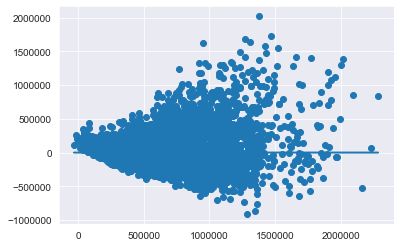

In [143]:
plt.scatter(model.predict(x_cols), model.resid)
plt.plot(model.predict(x_cols), [0 for i in range(len(df8))])

## Validating the Model

In [144]:
# importing train_test_split
y = df8['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_cols, y, test_size=0.3, 
                                                    random_state=42)


In [145]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14343 6147 14343 6147


In [146]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [149]:
#calculating the Mean Squared error
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 28016127450.678047
Test Mean Squarred Error: 28793406477.725872


In [150]:
# Caluclating Root Mean Squared Error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 167380.18834580766
Test RMSE: 169686.20002146866


In [151]:
df8['price'].describe()

count    2.049000e+04
mean     5.213129e+05
std      3.091187e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.470000e+05
75%      6.300000e+05
max      3.400000e+06
Name: price, dtype: float64

So far we can see that the RMSE for both the test and training data sets are relatively close.  So we know that so far, the model (despite its flaws) is not over trained.  It still has an root mean squared error of $170,000.  This isn't great, but it is not horrible in context. Given the price range of the data we're dealing with (between $78,000-$3.4 million), being off by $170,000 isn't too bad on the higher end of the spectrum.  It does make it a poor estimator of lower prices.  This is could be due to the fact that there was still great deal of outliers in our residual errors, even after trimming them down. It could also be due to the fact that the residuals also don't follow a normal distribution.  